## Моделирование NVT ансамбля

   - Система: равновесная система $1372$ частиц, полученная путём нагревания системы из $7\times7\times7$ ГЦК решёток до температуры $T_i$;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Ансамбль: $NVT$;
   - Начальная температура: $T_i = 1.3~\varepsilon / k_B$;
   - Конечная температура: $T_f = 10^{-4}~\varepsilon / k_B$;
   - Скорость нагревания: $v_T = 0.02~\varepsilon / k_B\tau$;
   - Термостат: масштабирование скоростей;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число "неравновесных" итераций: $40000$;
   - Равновесные характеристики системы рассчитывалась через каждые $2000$ шагов;
   - Число шагов на уравновешивание системы при фиксированных внешних условиях: $M=10000$;
   - Число ансамблей $N=5000$;
   - Усреднение по ансамблям при фиксированных внешних условиях: $2N-1$ шагов (к первому ансамблю относятся шаги с $1$ по $N$ шаг, ко второму - с $2$ по $N+1$ и т. д.);
   - Функция радиального распределения вычислялась как среднее по времени за первые $N$ шагов;

#### Импорт необходимых библиотек

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.dirname(sys.path[0]))

import scripts.constants as con
from scripts.postprocessing import PostProcessor

#### Настройки графиков

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = [i / 2.54 for i in (15, 15)]
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.labelsize'] = 14

#### Путь к файлам с данными

In [3]:
CURRENT_DATA = '2022-01-19'
DIR_POSTFIX = ''
# DIR_POSTFIX = '_cooling_from_prepared_1.3_normal'
PLOT_FILENAME_POSTFIX = 'cooling_from_prepared_1.3_normal'

In [4]:
PATH_TO_CURRENT_DATA = os.path.join(con.PATH_TO_DATA, f'{CURRENT_DATA}{DIR_POSTFIX}')
PATH_TO_CURRENT_DATA

'C:\\albert\\git_reps\\molecular_dynamics\\data\\2022-01-19'

In [5]:
PATH_TO_CURRENT_PLOTS = os.path.join(con.PATH_TO_PLOTS, f'{CURRENT_DATA}{DIR_POSTFIX}')
PATH_TO_CURRENT_PLOTS

'C:\\albert\\git_reps\\molecular_dynamics\\plots\\2022-01-19'

#### Параметры системы, при которых были подчитаны функции радиального распределения, среднеквадратичные смещения и т.д.

In [6]:
setups = []
for filename in os.listdir(PATH_TO_CURRENT_DATA):
    if filename.startswith('rdf') and filename.endswith('csv'):
        parts = filename.split('_')
        setup = {
            'temperature': float(parts[2]), 
            'pressure': float(parts[4]), 
            'heating_velocity': float(parts[6]) if 'HV' in parts else None,
            
        }
        setups.append(setup)
        
setups

[{'temperature': 1.29206, 'pressure': 1.43614, 'heating_velocity': 0.0},
 {'temperature': 1.29317, 'pressure': 1.57314, 'heating_velocity': 0.0},
 {'temperature': 1.29398, 'pressure': 1.56285, 'heating_velocity': 0.0},
 {'temperature': 1.29541, 'pressure': 1.55359, 'heating_velocity': 0.0},
 {'temperature': 1.29644, 'pressure': 1.61113, 'heating_velocity': 0.0},
 {'temperature': 1.29646, 'pressure': 1.46461, 'heating_velocity': 0.0},
 {'temperature': 1.29684, 'pressure': 1.56099, 'heating_velocity': 0.0},
 {'temperature': 1.29751, 'pressure': 1.506, 'heating_velocity': 0.0},
 {'temperature': 1.30085, 'pressure': 1.46841, 'heating_velocity': 0.0},
 {'temperature': 1.30172, 'pressure': 1.59434, 'heating_velocity': 0.0}]

#### Инициализация объекта для обработки данных и вывод таблицы значений функции радиального распределения

In [7]:
pp = PostProcessor(
    path_to_data=PATH_TO_CURRENT_DATA, 
    path_to_plots=PATH_TO_CURRENT_PLOTS, 
    plot_filename_postfix=PLOT_FILENAME_POSTFIX, 
    setups=setups,
)
pp.rdf.data

radius   setup_0   setup_1   setup_2   setup_3   setup_4   setup_5  \
0      0.01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      0.03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.05  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
..      ...       ...       ...       ...       ...       ...       ...   
606    6.07  1.000642  1.000874  0.999775  1.000695  1.000783  1.001558   
607    6.08  1.000260  1.001083  0.998896  1.000666  1.000769  1.000878   
608    6.09  1.000876  1.000981  0.999899  1.000182  1.000467  1.001015   
609    6.10  1.001035  1.000611  1.000176  1.001034  1.000665  1.000347   
610    6.11  1.001123  1.001806  1.000344  1.001549  1.000060  1.000055   

      setup_6   setup_7   setup_8   setup_9  
0    0.000000  0.000000  0.000000  0.000000  
1    0.000000  0.000000  0.000000  0.000000  
2    0.000000  0.000000  0.000000  0.000000  
3    0.000000  0.000000  0.000000  0.000000  
4    0.000000  0.000000  0.000000  0.000000  
..        ...       ...       ...       ...  
606  1.000482  1.000906  1.001064  1.002024  
607  1.001764  1.001506  1.000404  1.001057  
608  1.001080  1.001422  1.000787  1.001574  
609  1.001473  1.001122  1.000343  1.002091  
610  1.001928  1.000518  0.999656  1.001070  

[611 rows x 11 columns]

In [8]:
pp.rdf.data.sum()

radius     1869.660000
setup_0     535.363193
setup_1     535.390200
setup_2     535.358686
setup_3     535.354780
setup_4     535.355689
setup_5     535.395439
setup_6     535.358086
setup_7     535.388669
setup_8     535.351418
setup_9     535.385887
dtype: float64

#### Графики функций радиального распределения $g(\textbf{r})$ при различных температурах

$$g(\textbf{r})=\dfrac{V}{N^2}\left<\sum_{i}{\sum_{j\ne i}{\delta(\textbf{r}-\textbf{r}_{ij})}}\right>$$

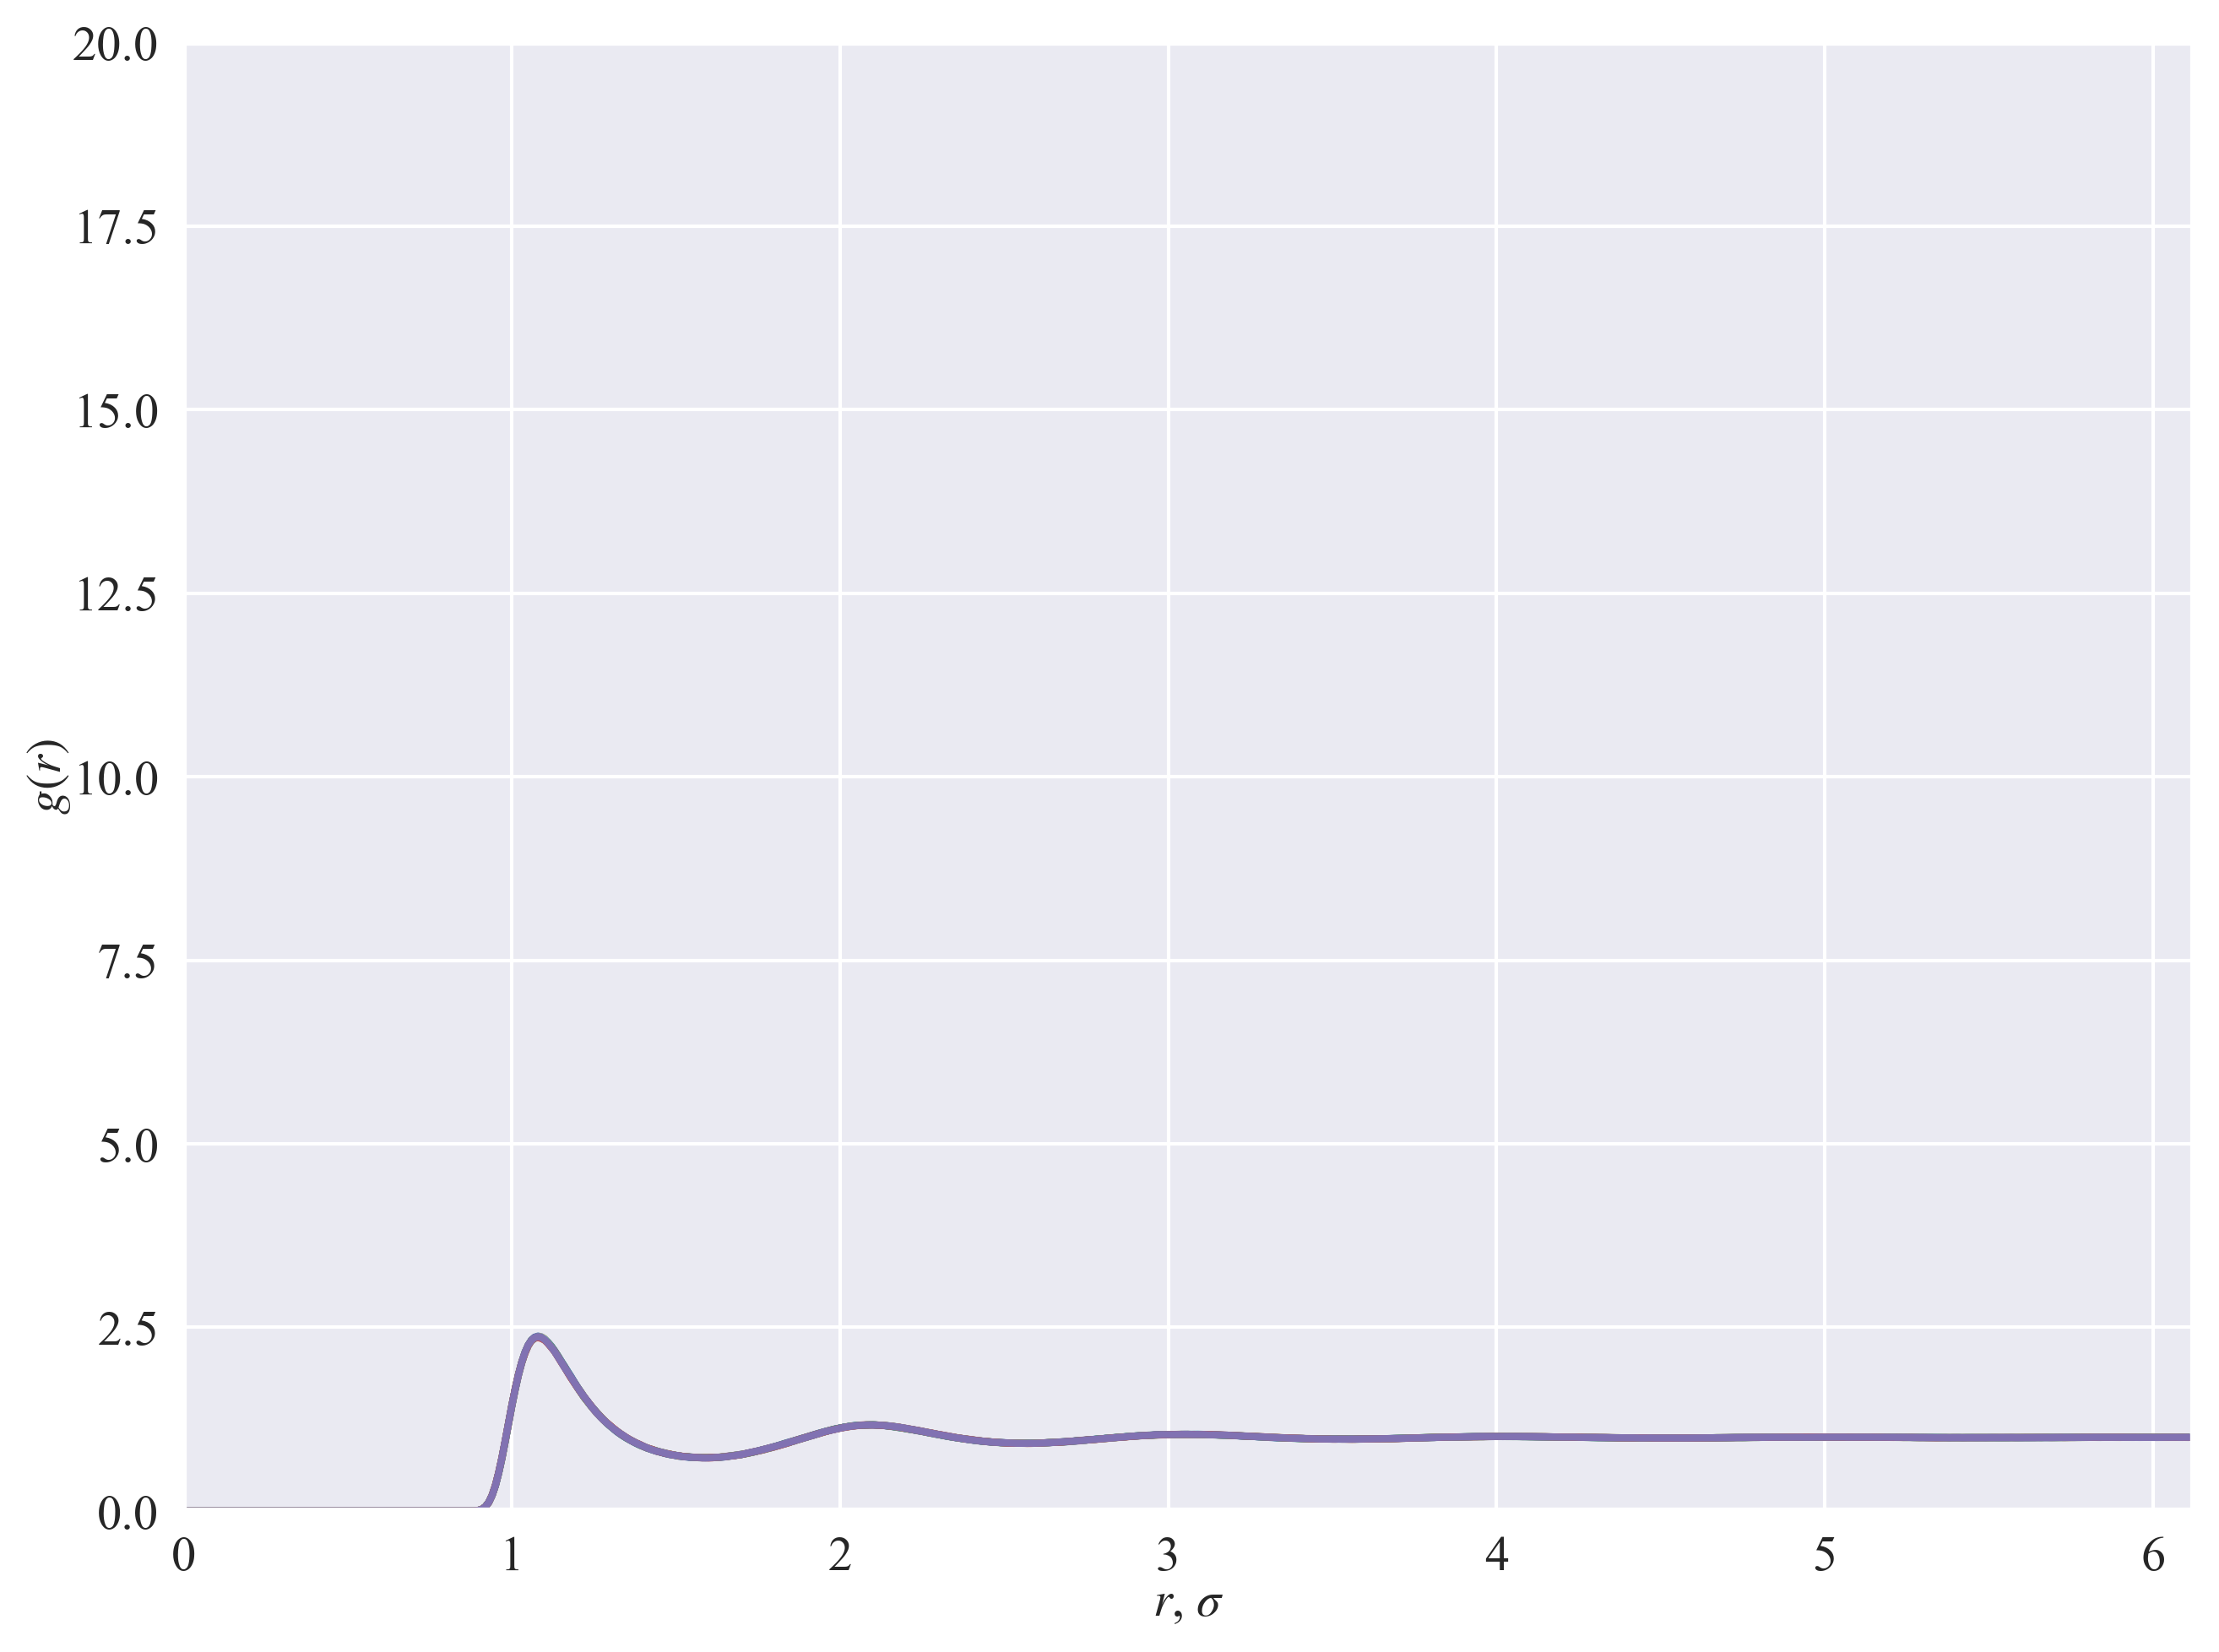

In [9]:
pp.plot_rdf(
    figsize=(10.24, 7.68),
#     shift=0.5,
    left=0,
    right=6.125,
    bottom=0, 
    top=20,
)

#### Временная зависимость среднеквадратичного смещения $\left<\Delta r^2(t)\right>$ при различных температурах

$$\left<\Delta r^2(t)\right>=\dfrac{1}{N}\sum_{i=1}^{N}{\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2}$$

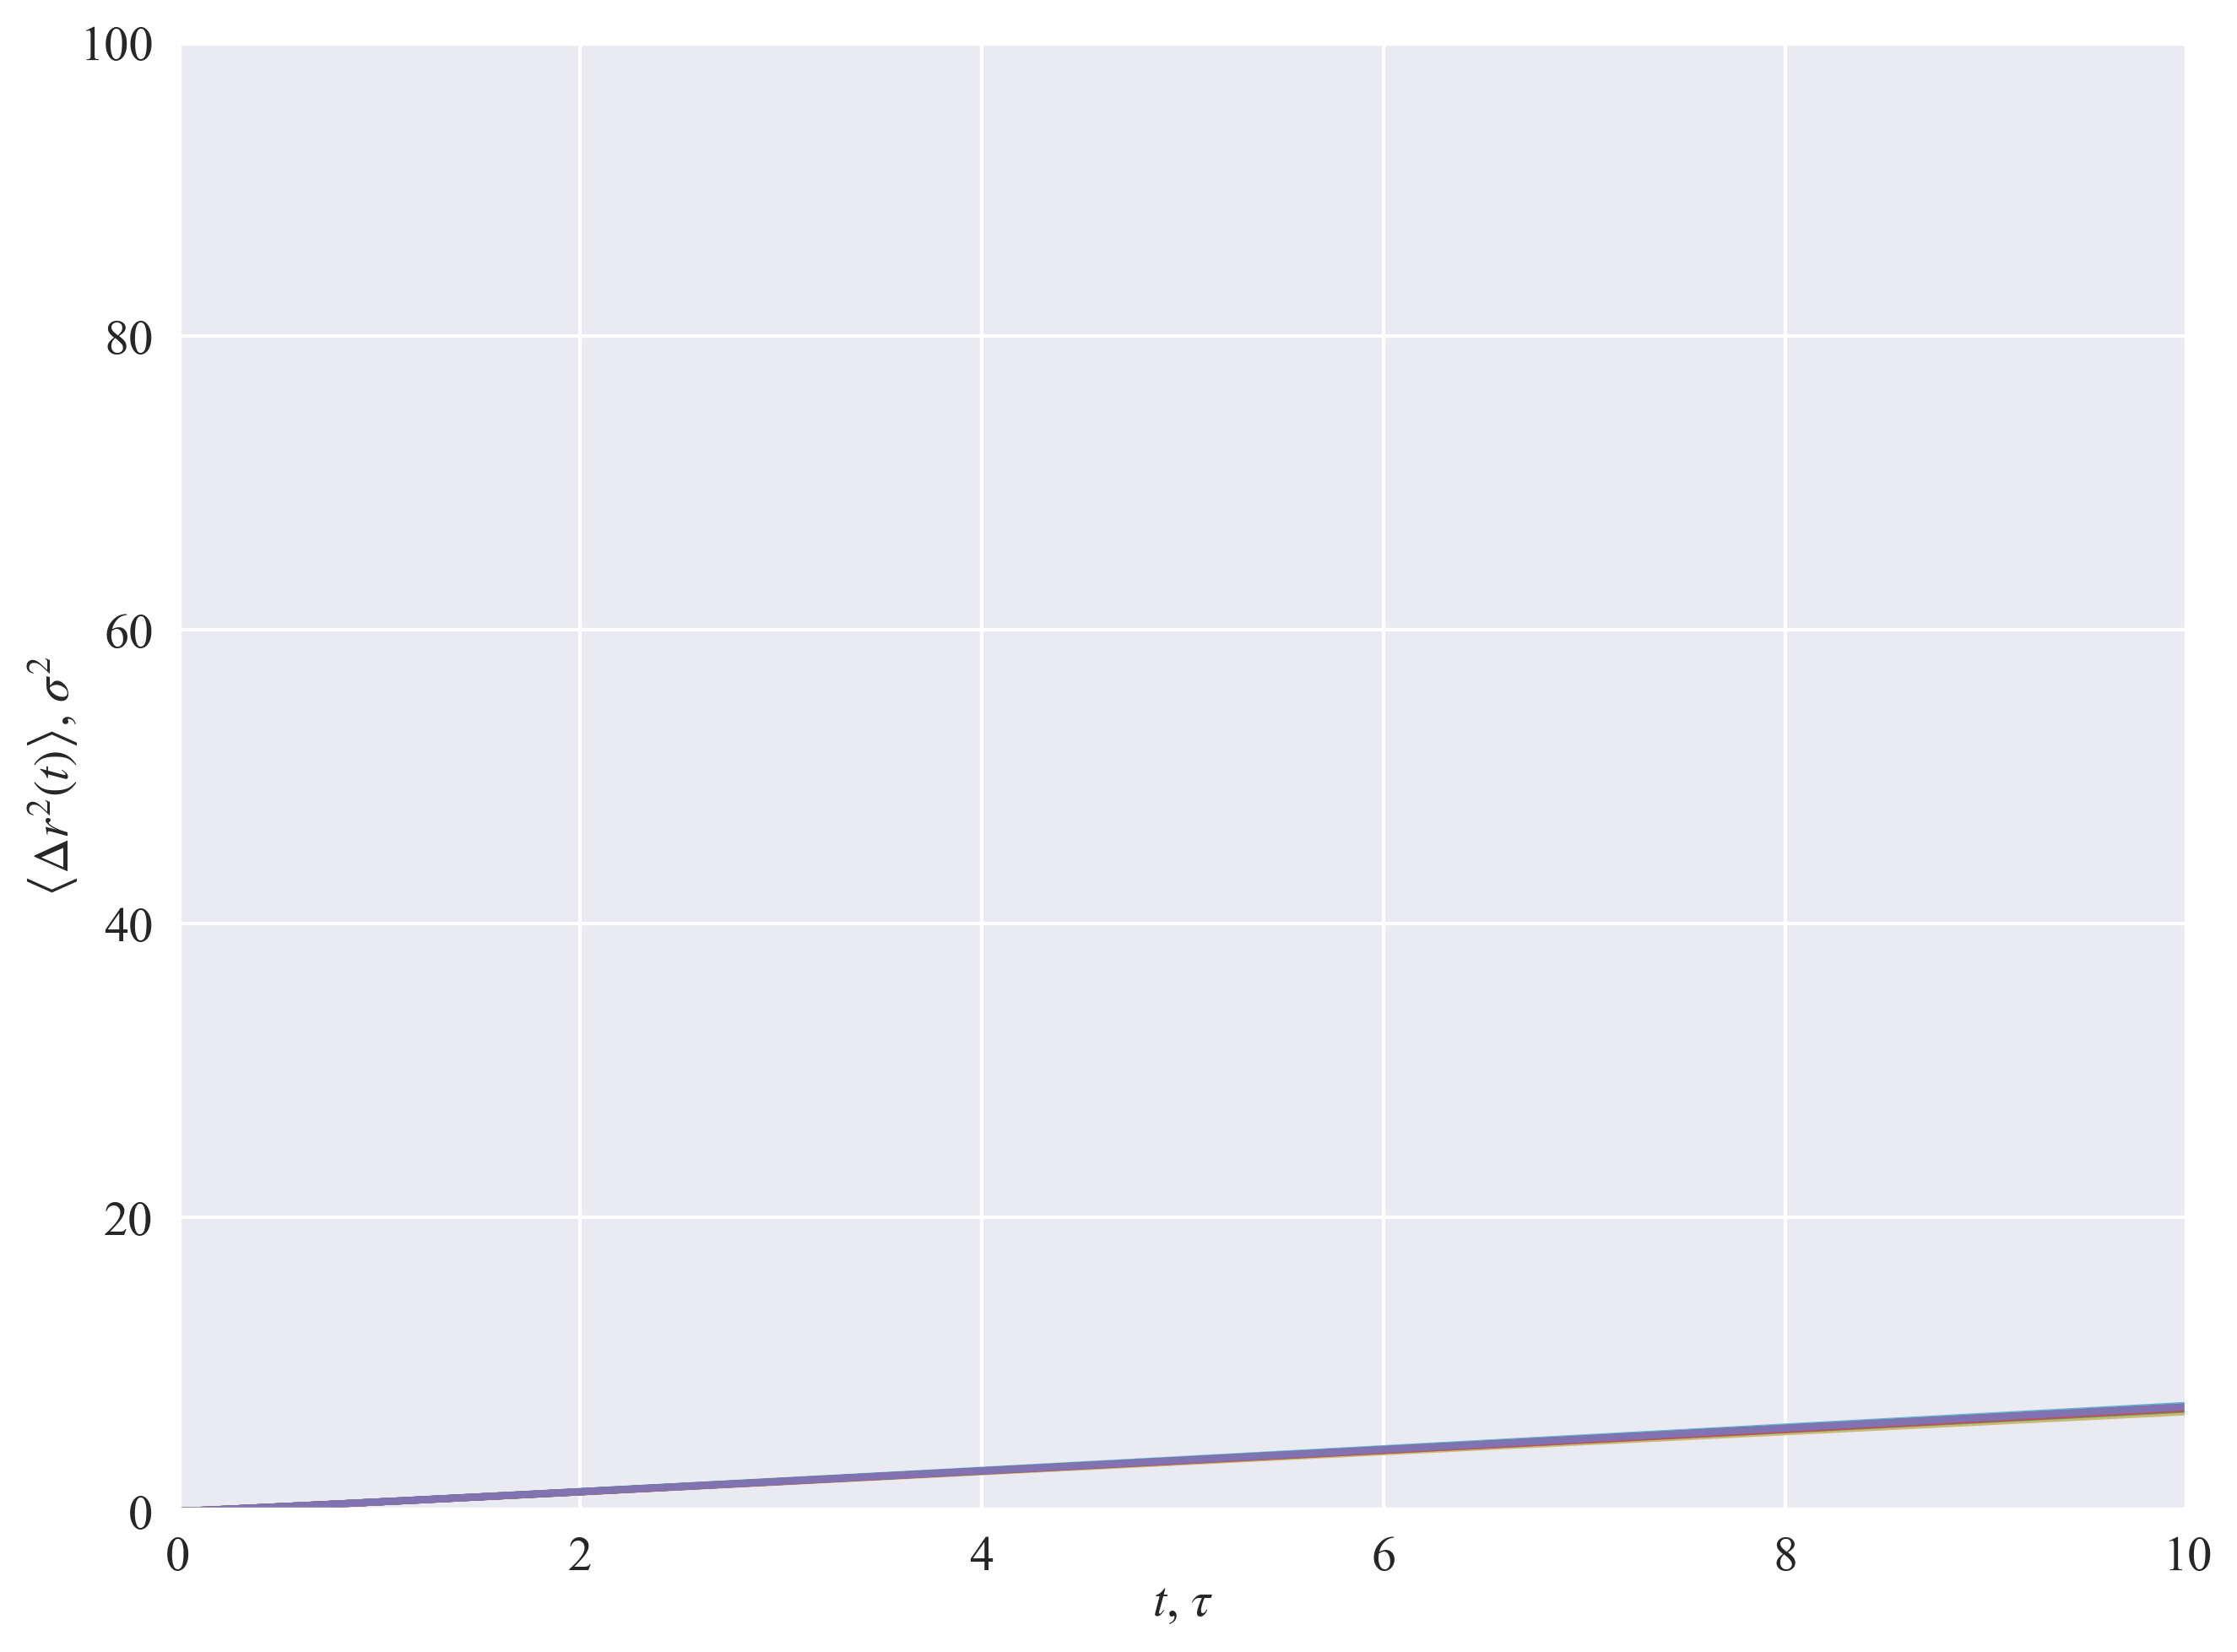

In [10]:
pp.plot_msd(
    figsize=(10.24, 7.68),
    left=0,
    right=10,
    bottom=1e-9, 
    top=1e2,
#     y_scale='log',
)

#### Временная зависимость автокорреляционнной функции скорости $\Psi(t)$ при различных температурах

$$\Psi(t) = \dfrac{1}{N}\left<\sum_{j=1}^N{\vec{v}_j(t)\vec{v}_j(0)}\right>$$

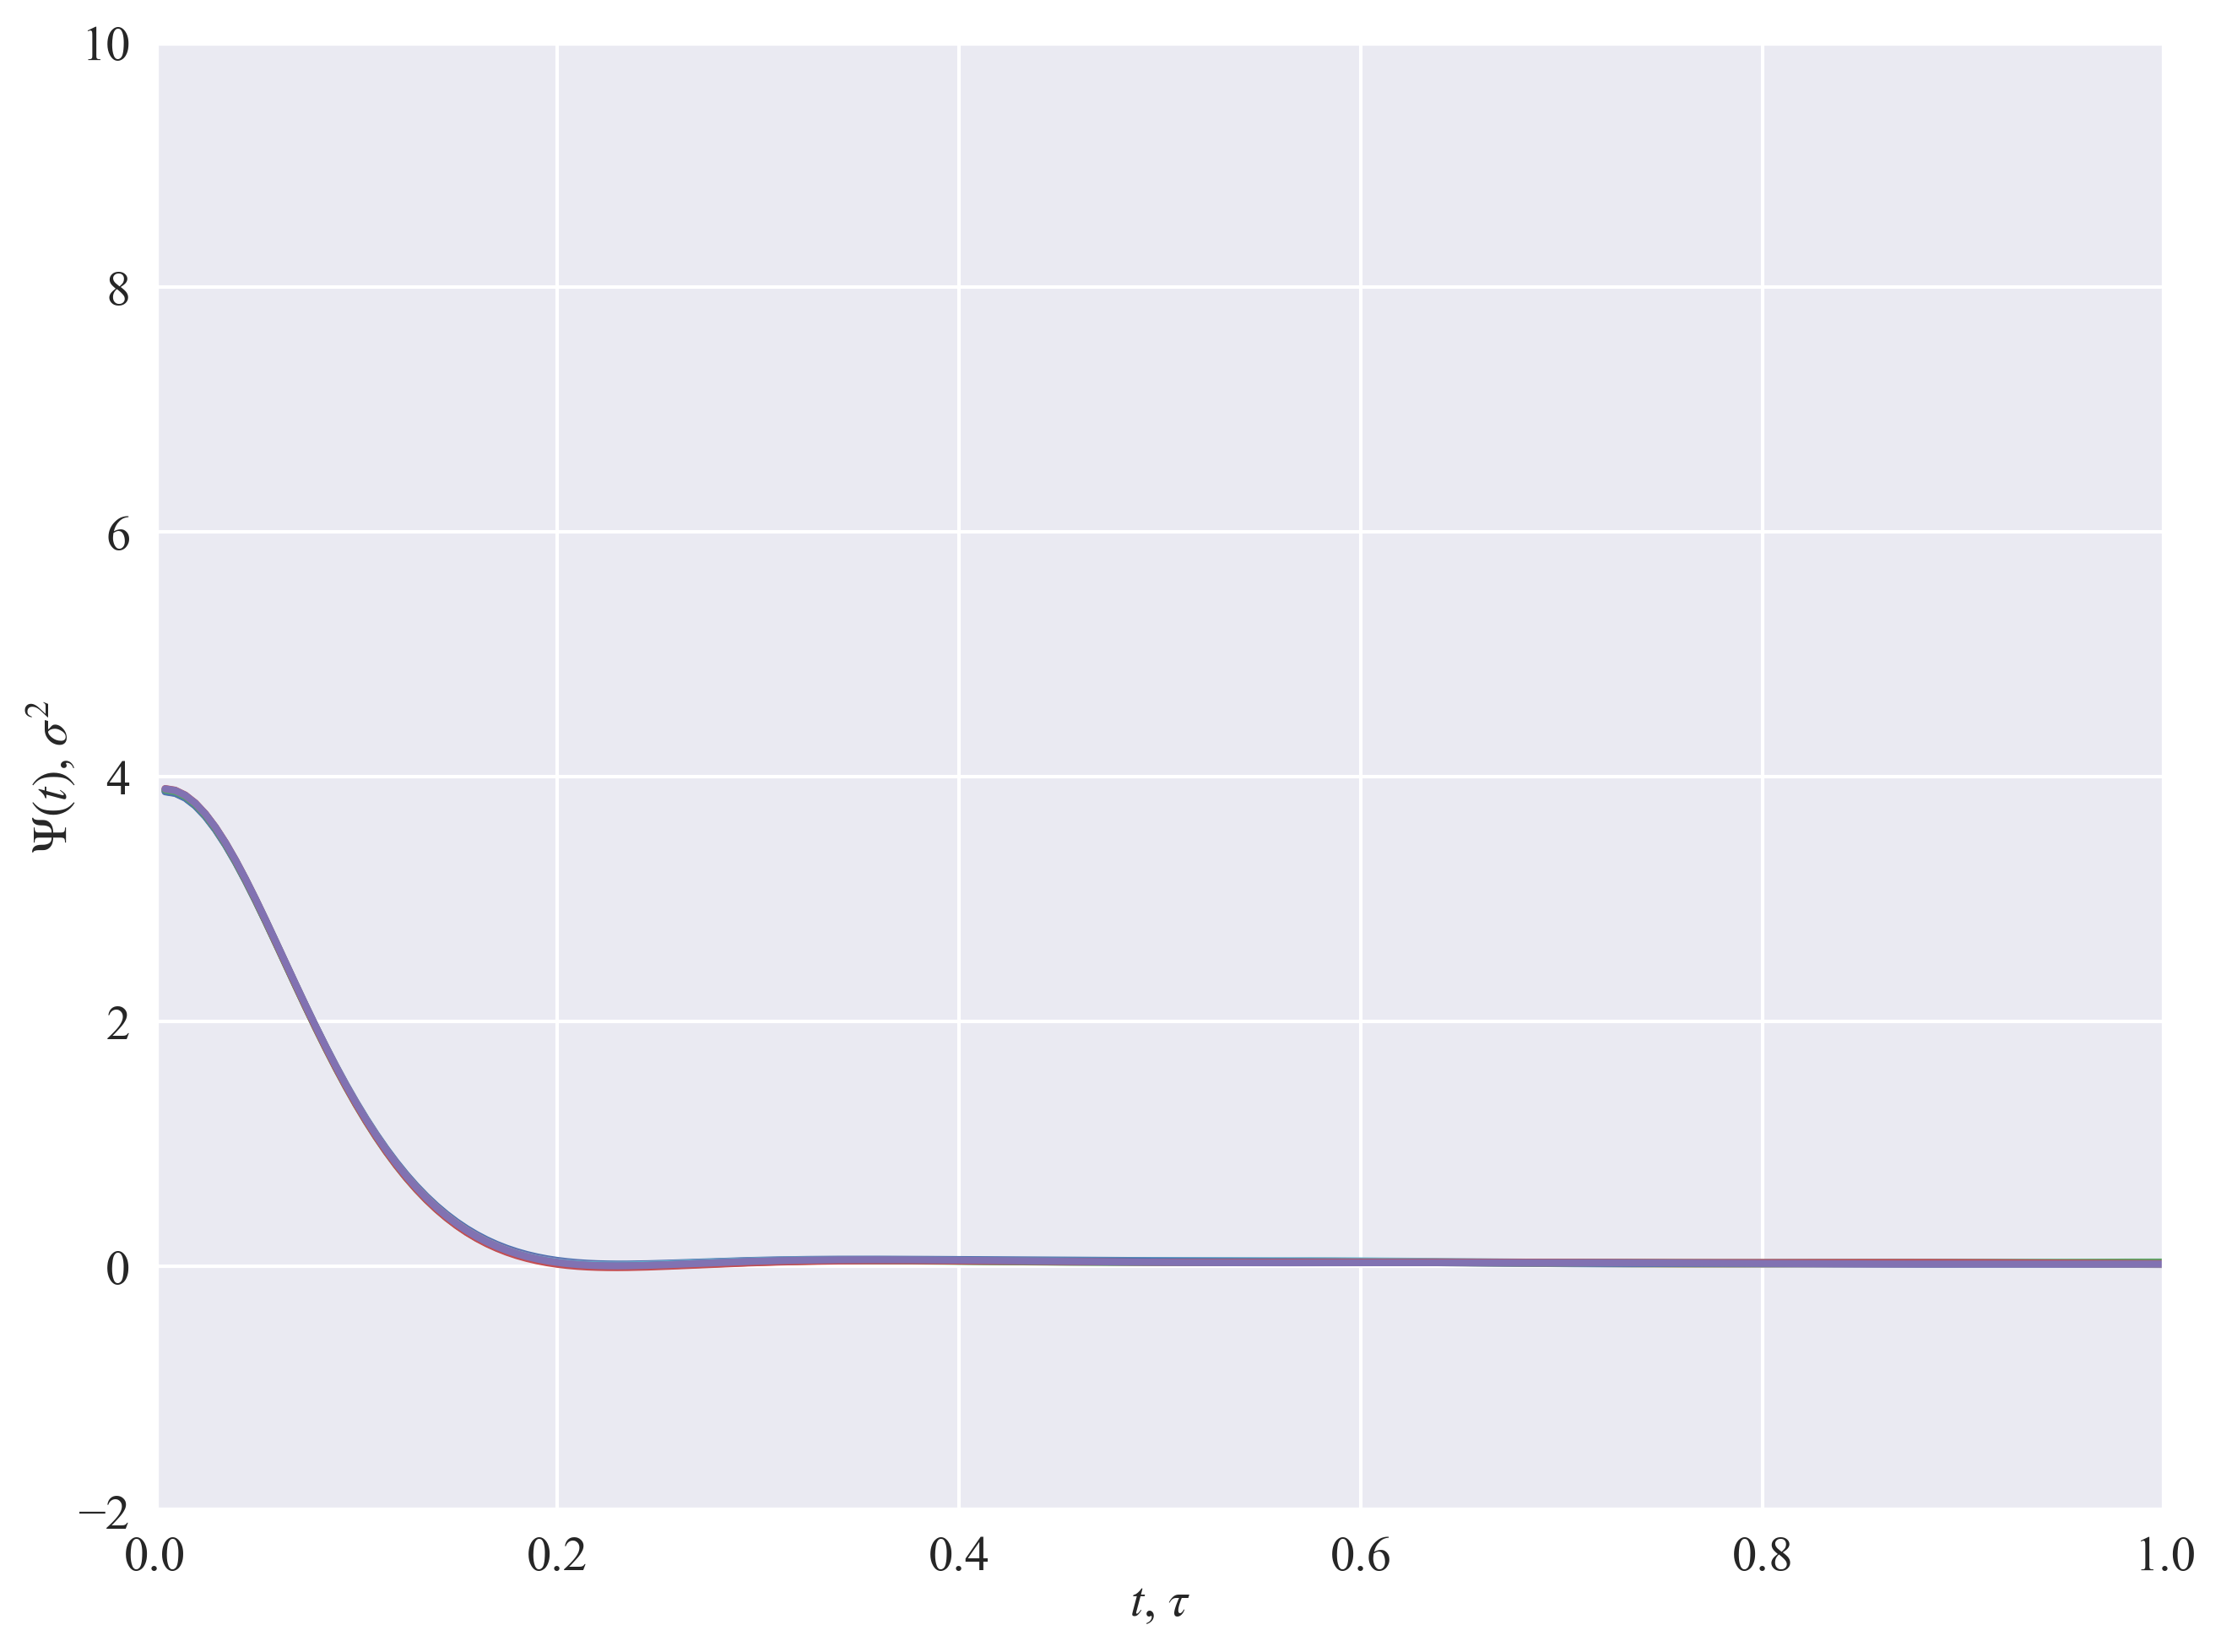

In [11]:
pp.plot_vaf(
    figsize=(10.24, 7.68),
    left=0,
    right=1,
    bottom=-2,
    top=10,
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Эйнштейна, при различных температурах

$$D_E(t)=\dfrac{\left<\left<\Delta r^2\right>\right>}{6t}=\dfrac{1}{6tN}\left<\sum_{i=1}^{N}\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2\right>$$

$$D=\lim_{t\rightarrow\infty}{D_E(t)}$$

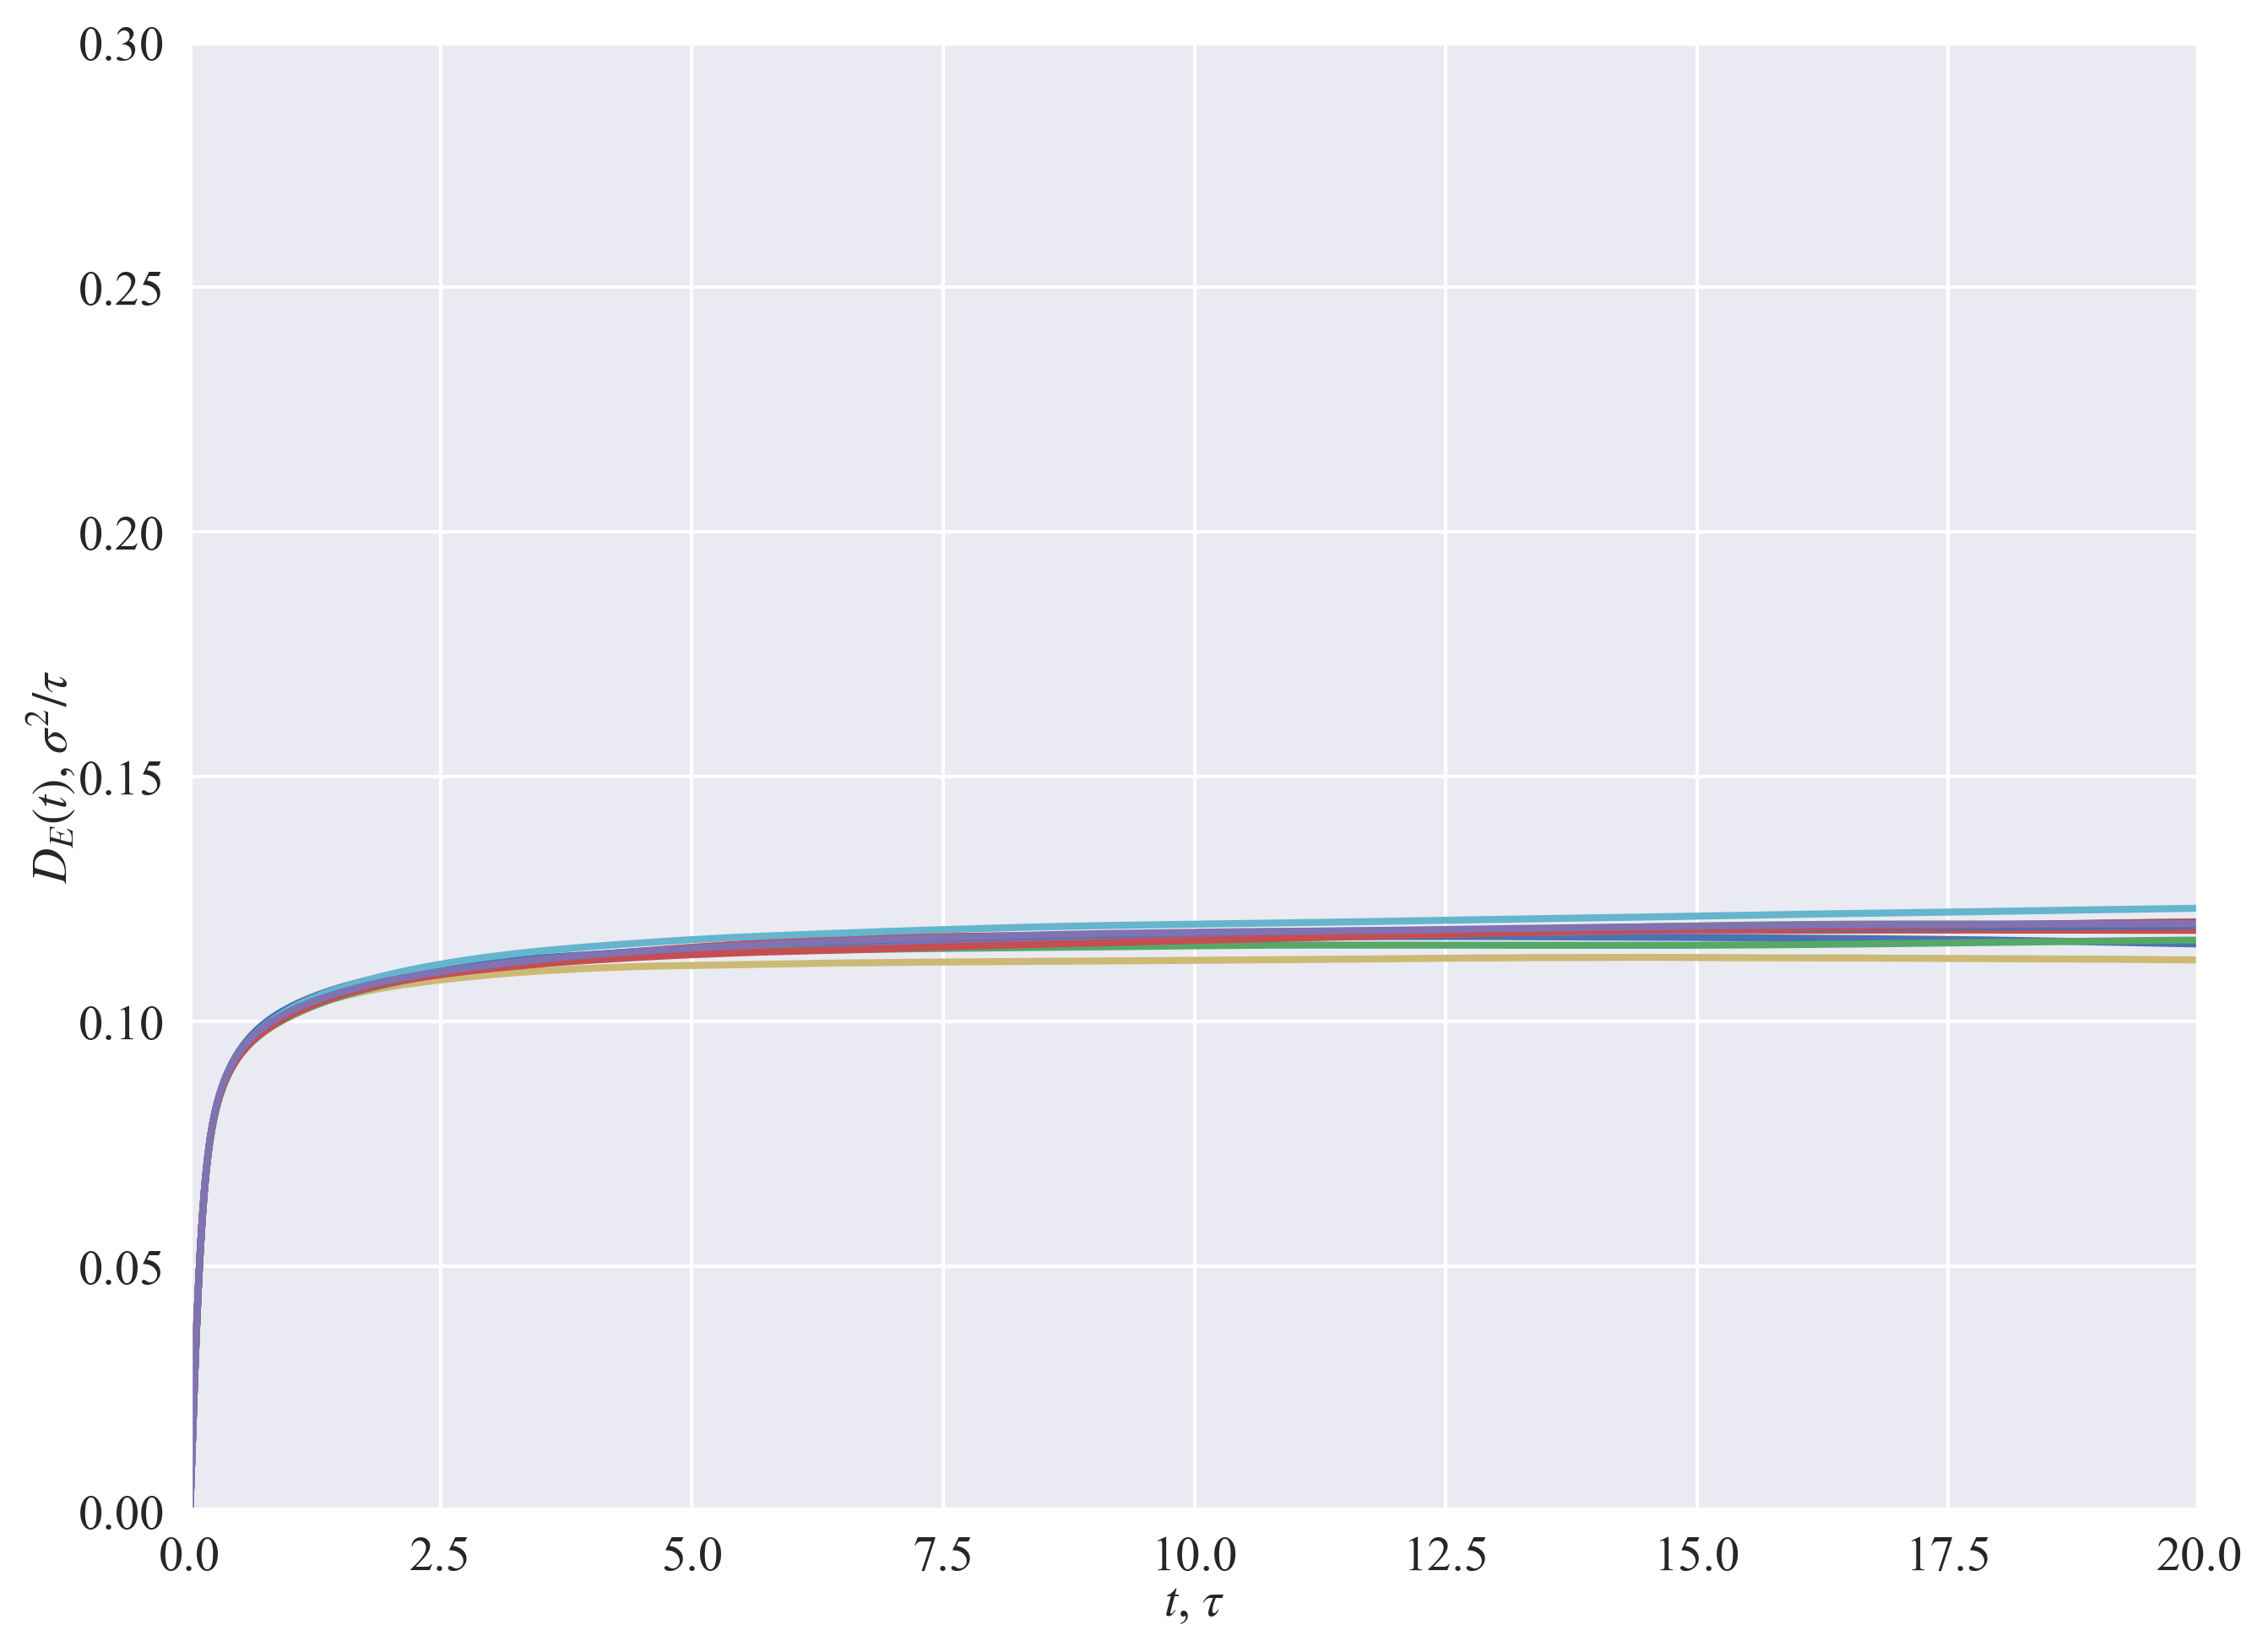

In [12]:
pp.plot_einstein_diffusion(
    figsize=(10.24, 7.68),
    left=0,
    right=20,
    bottom=0, 
    top=0.3,
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Грина-Кубо, при различных температурах

$$D_{GK}(t)=\dfrac{1}{3}\int_{0}^{t}{\Psi(\tau)d\tau}=\dfrac{1}{3N}\int_{0}^{t}{\left<\sum_{j=1}^N{\vec{v}_j(\tau)\vec{v}_j(0)}\right>d\tau}$$

$$D=\lim_{t\rightarrow\infty}{D_{GK}(t)}$$

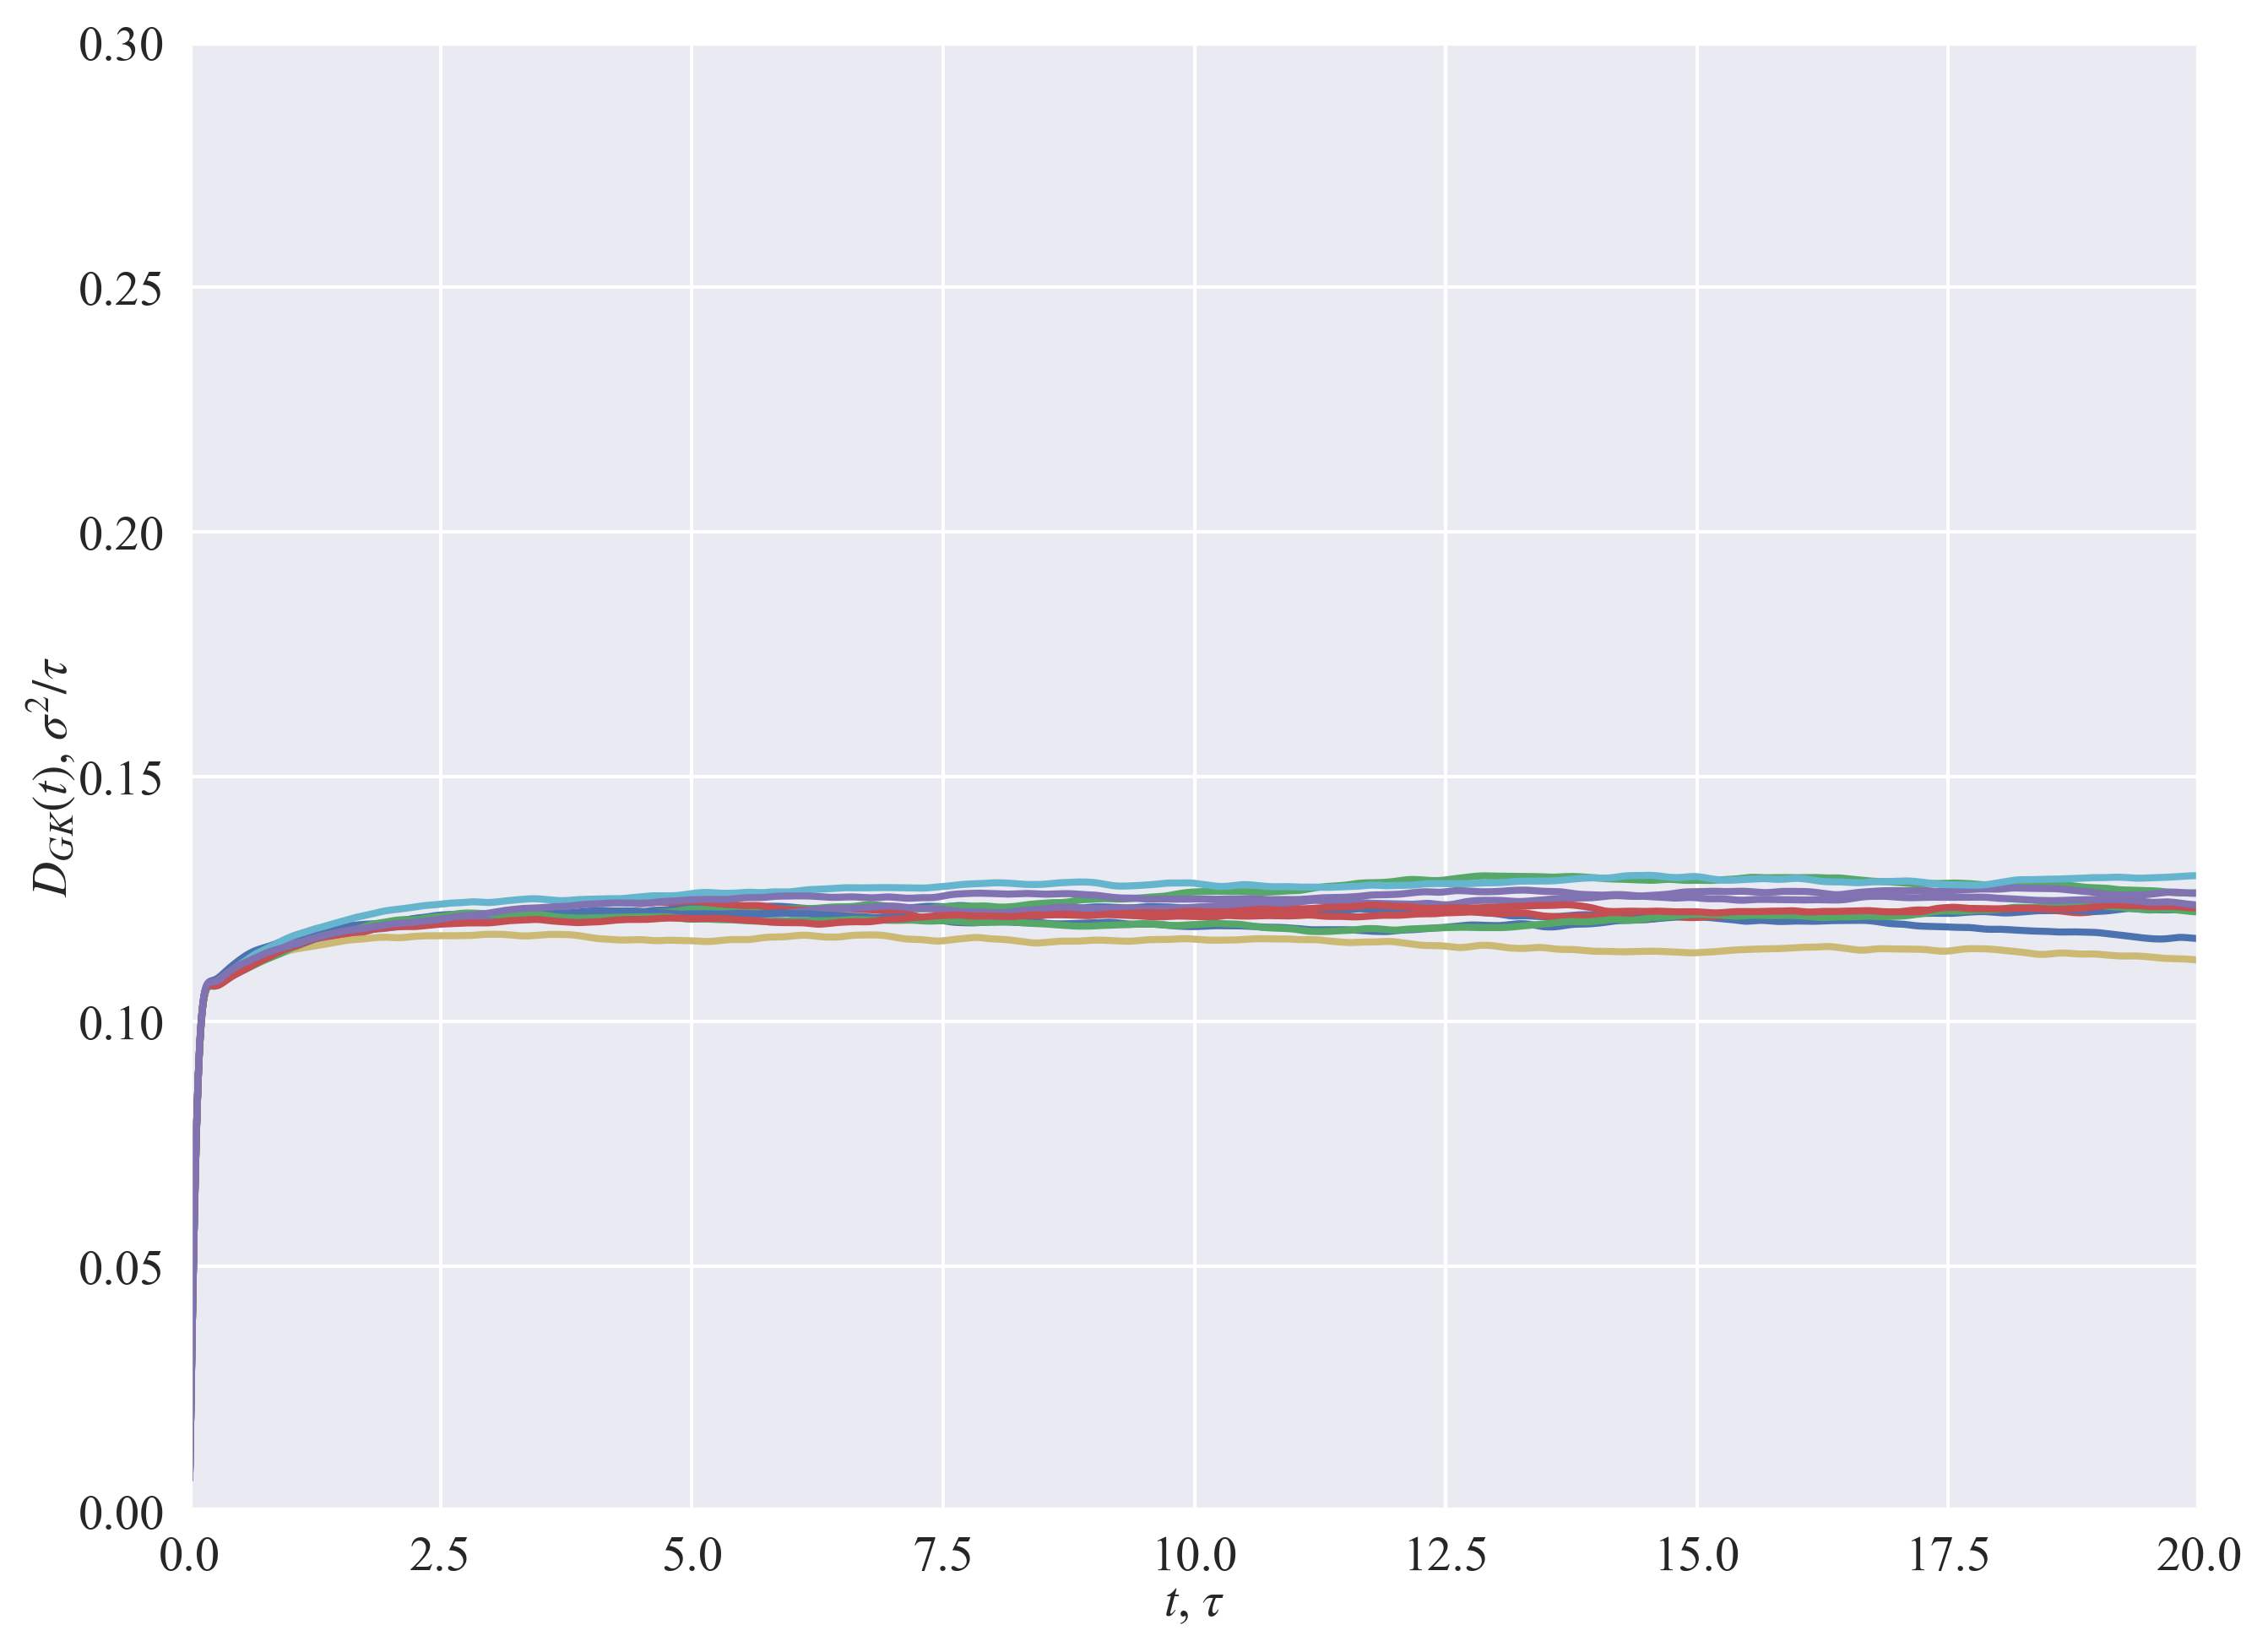

In [13]:
pp.plot_gk_diffusion(
    figsize=(10.24, 7.68),
    left=0,
    right=20,
    bottom=0, 
    top=0.3,
)

#### Температурная зависимость коэффициентов самодиффузии, вычисленных через соотношения Эйнштейна

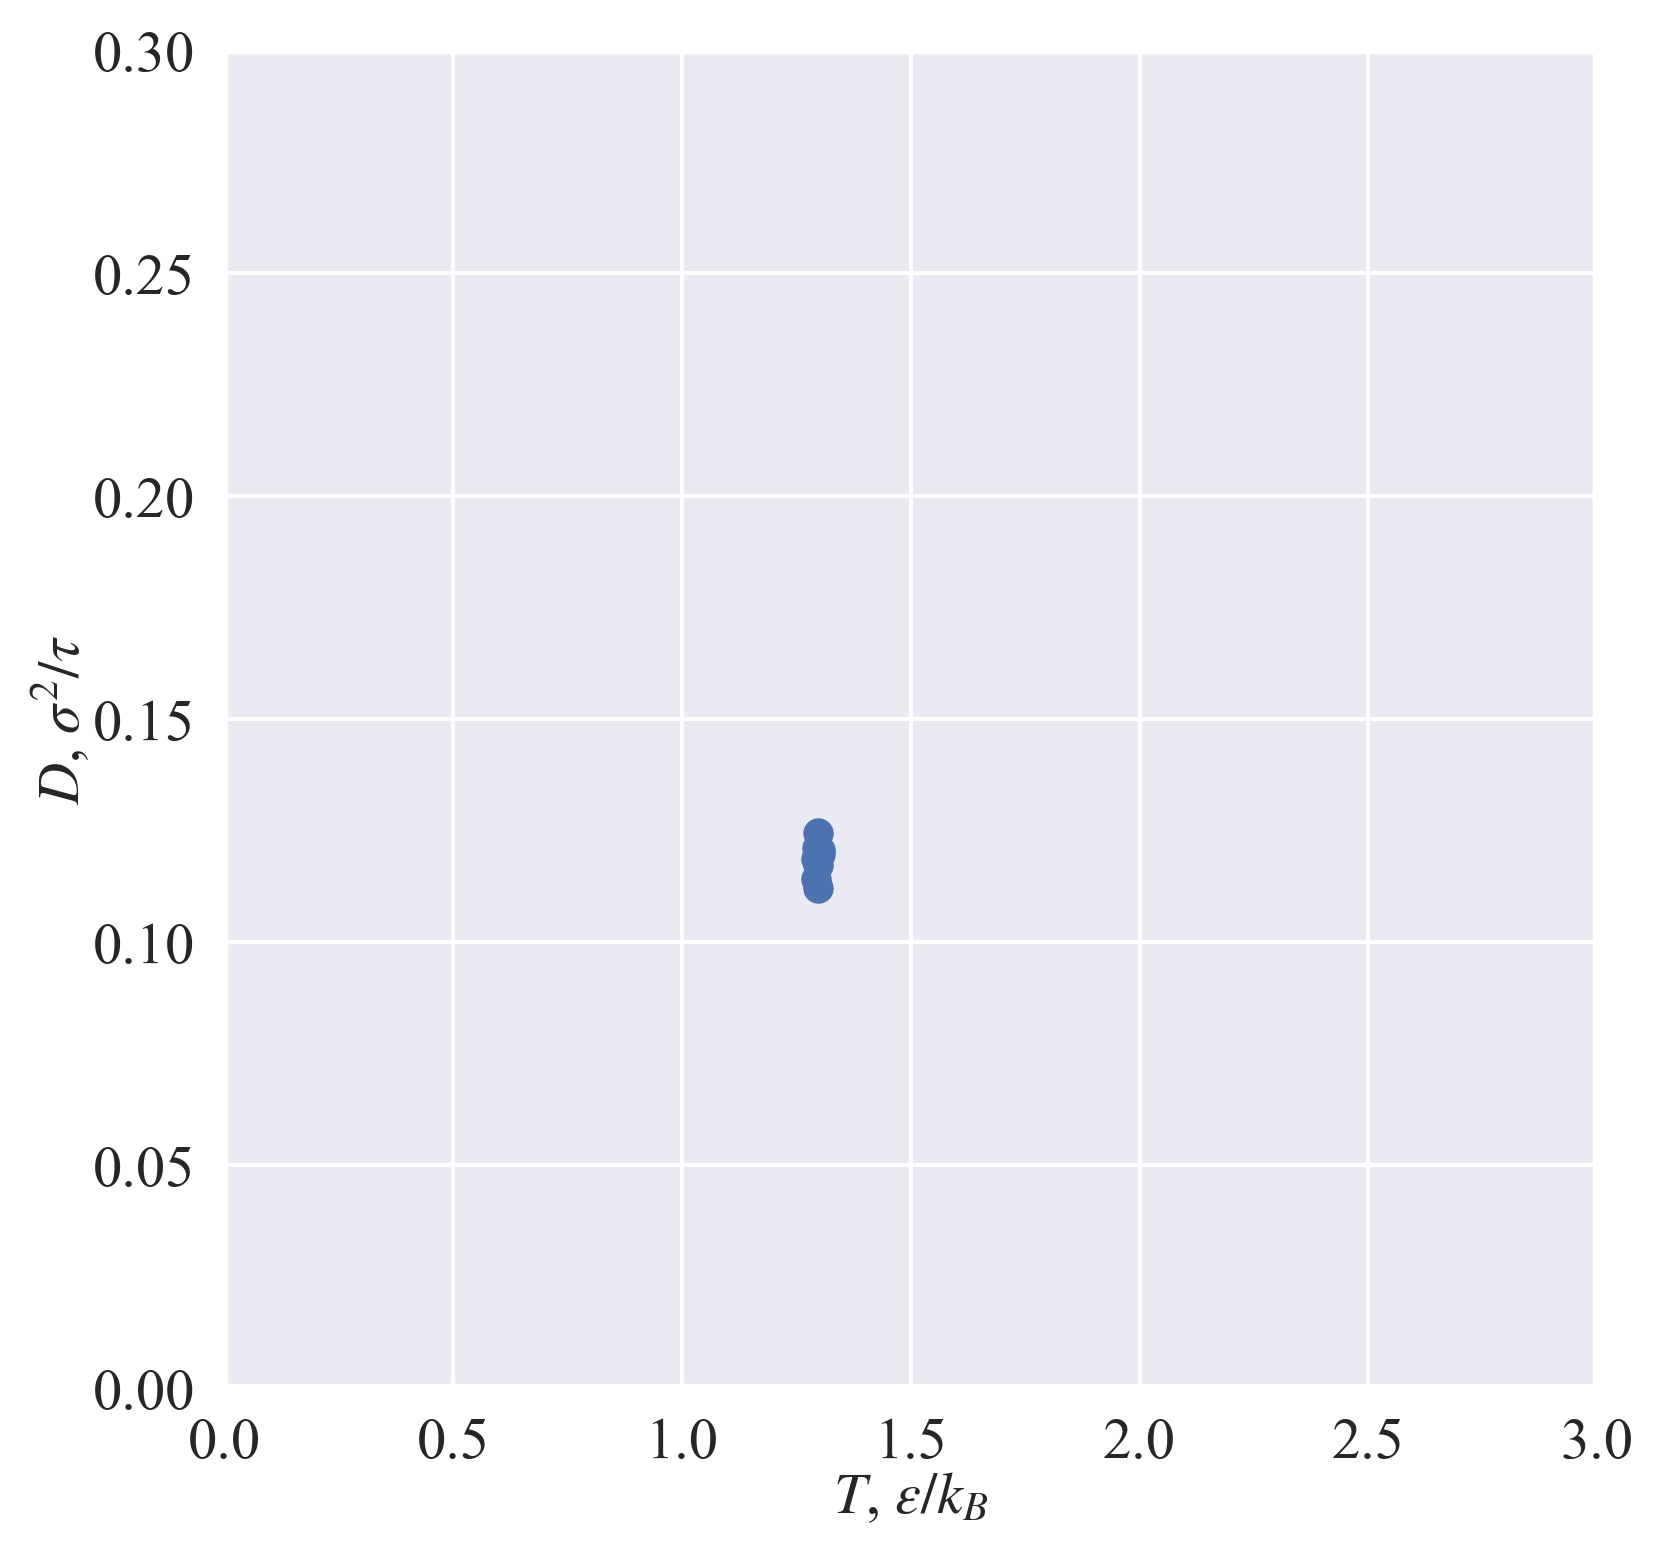

In [14]:
pp.plot_diffusion(
    figsize=(10.24, 7.68),
    left=0, 
    right=3,
    bottom=0, 
    top=0.3,
)

#### Таблица временных зависимостей характеристик системы

In [15]:
if 'time' not in pp.system_parameters.columns:
    pp.system_parameters['time'] = (pp.system_parameters.index + 1) * 0.005
pp.system_parameters = pp.system_parameters[39:].reset_index(drop=True)

pp.system_parameters = pp.system_parameters[pp.system_parameters['volume'] != 0.0]
pp.system_parameters

time  temperature  pressure  kinetic_energy  potential_energy  \
0          0.200      1.30309   1.57575       2676.6045        -6266.6724   
1          0.205      1.30342   1.57576       2678.0703        -6267.3700   
2          0.210      1.30376   1.57426       2679.3528        -6268.7540   
3          0.215      1.30399   1.57099       2680.2122        -6271.4130   
4          0.220      1.30413   1.56671       2680.7834        -6274.2900   
...          ...          ...       ...             ...               ...   
910756  4553.980      1.29493   1.58093       2660.9585        -6277.4155   
910757  4553.985      1.29452   1.57777       2659.2050        -6277.7020   
910758  4553.990      1.29406   1.57648       2657.4597        -6276.3857   
910759  4553.995      1.29369   1.57711       2656.0808        -6273.2266   
910760  4554.000      1.29344   1.57869       2655.2585        -6269.6963   

        total_energy     virial  msd  diffusion     volume  
0         -3590.0679  3336.7441  0.0        0.0  1838.2656  
1         -3589.2998  3333.8813  0.0        0.0  1838.2656  
2         -3589.4011  3323.0112  0.0        0.0  1838.2656  
3         -3591.2010  3303.2417  0.0        0.0  1838.2656  
4         -3593.5066  3278.4963  0.0        0.0  1838.2656  
...              ...        ...  ...        ...        ...  
910756    -3616.4570  3396.5650  0.0        0.0  1838.2656  
910757    -3618.4970  3382.6887  0.0        0.0  1838.2656  
910758    -3618.9260  3379.0688  0.0        0.0  1838.2656  
910759    -3617.1458  3385.2790  0.0        0.0  1838.2656  
910760    -3614.4377  3395.6301  0.0        0.0  1838.2656  

[910761 rows x 10 columns]

#### Зависимость объёма системы от времени

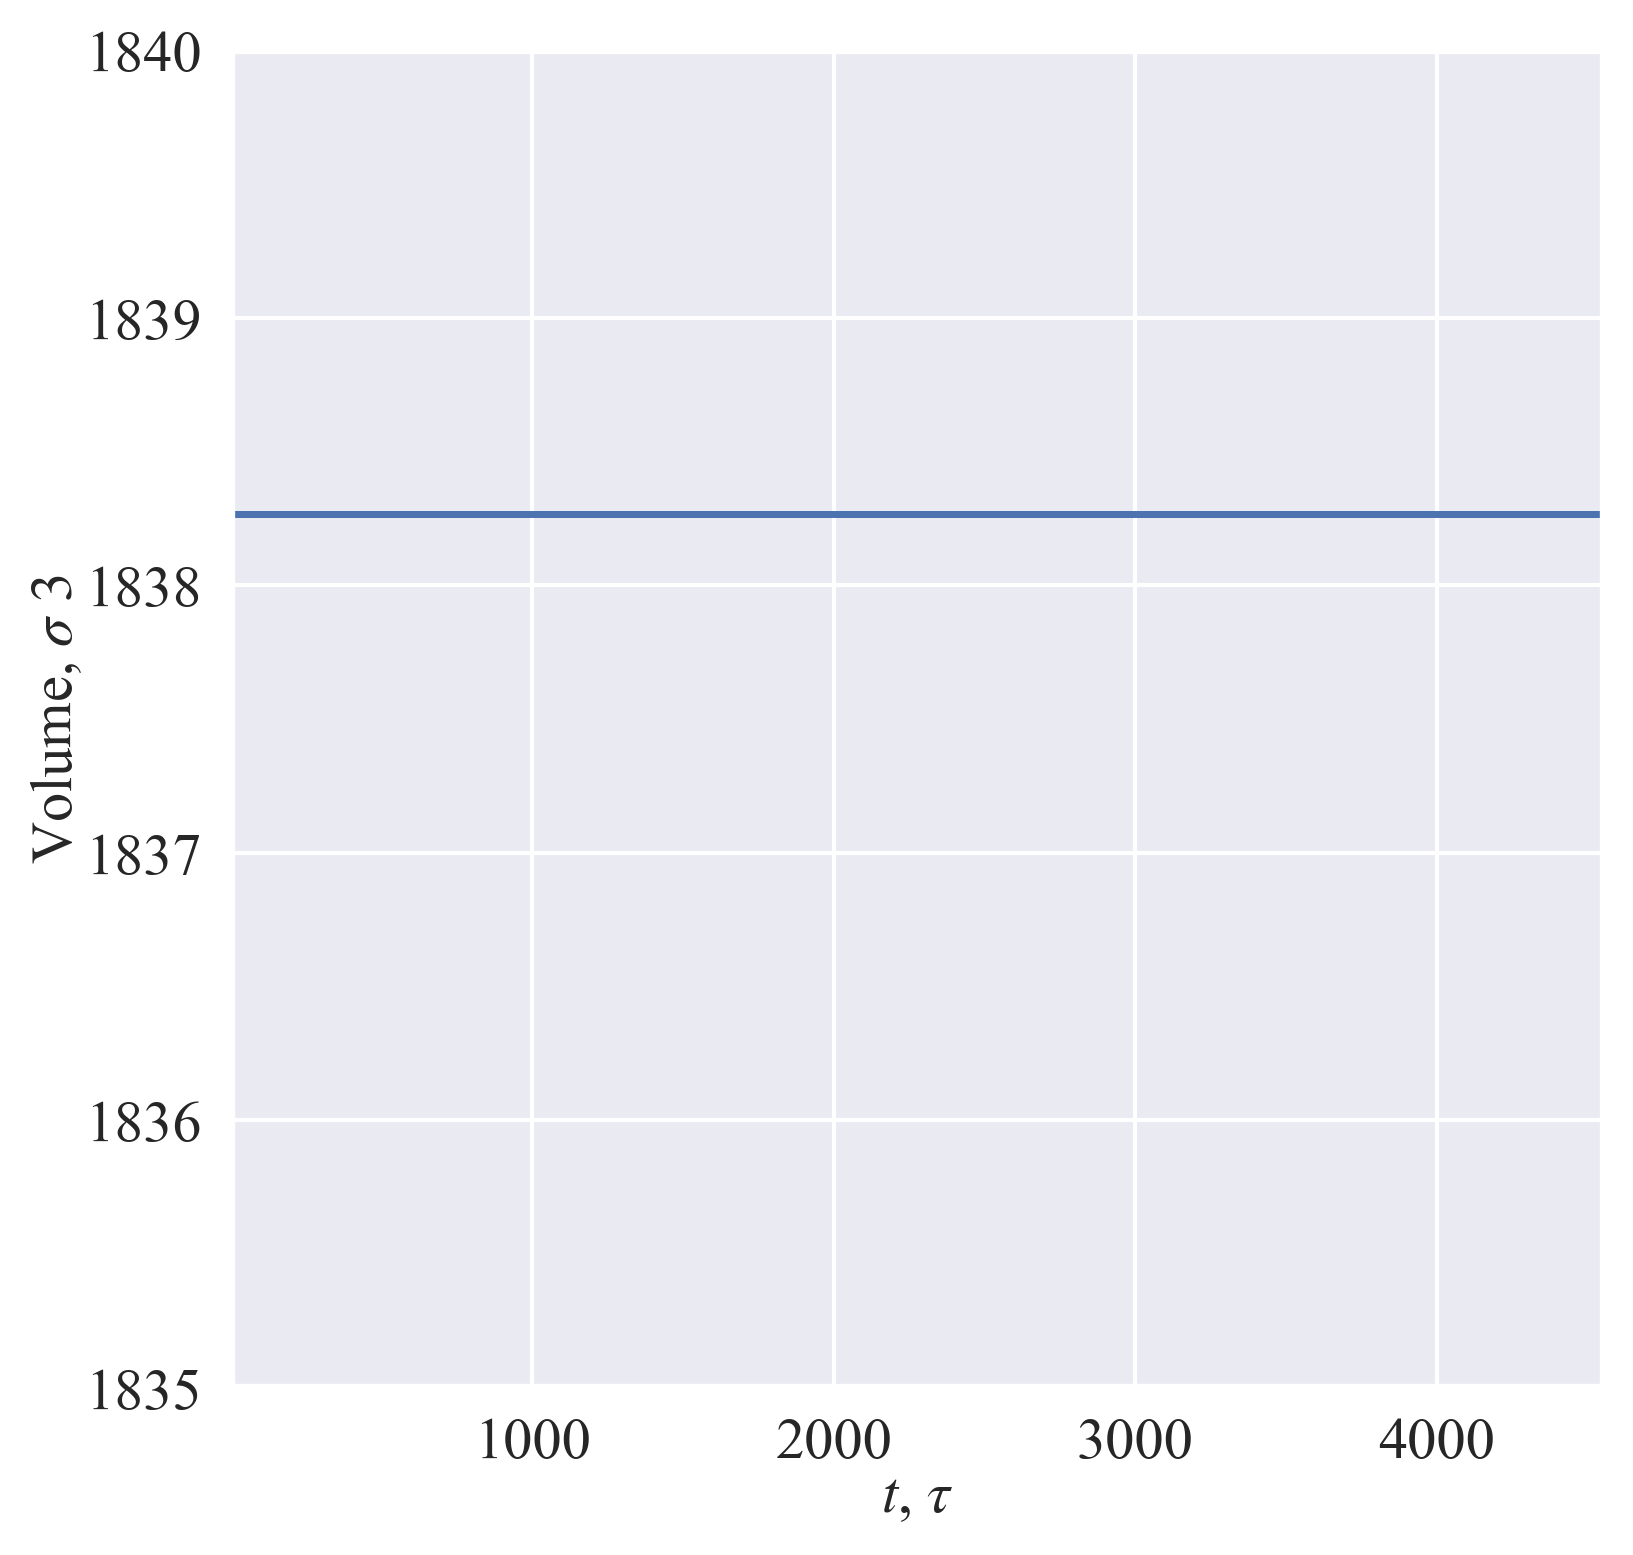

In [16]:
pp.plot_system_parameters(
    column_names=['volume',],
    y_label=r'Volume, $\sigma ^ 3$',
    bottom=1835,
    top=1840,
);

#### Зависимость температуры системы от времени

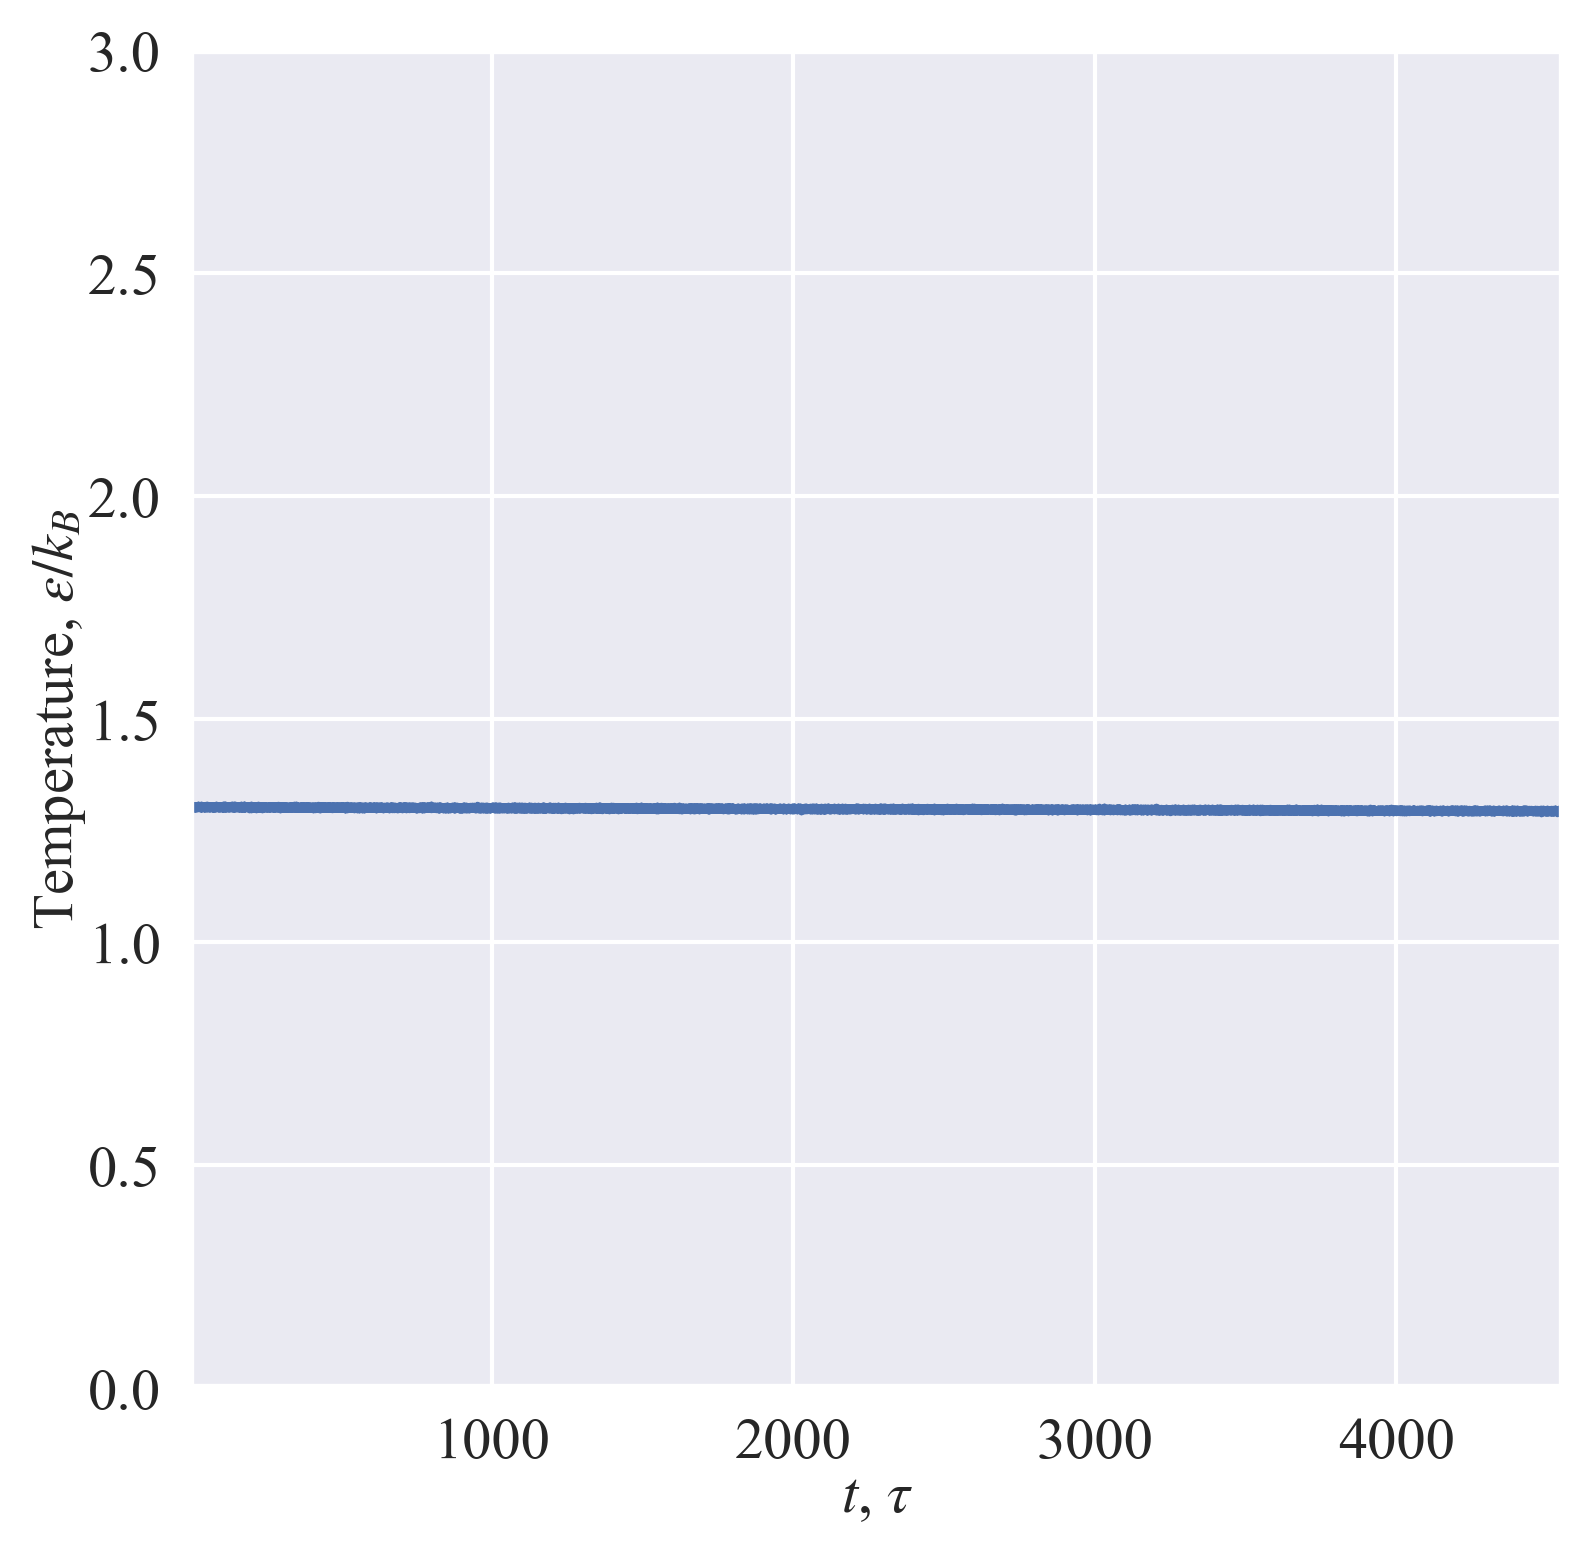

In [17]:
pp.plot_system_parameters(
    column_names=['temperature',],
    y_label=r'Temperature, $\epsilon / k_B$',
    bottom=0,
    top=3,
);

#### Зависимость давления системы от времени

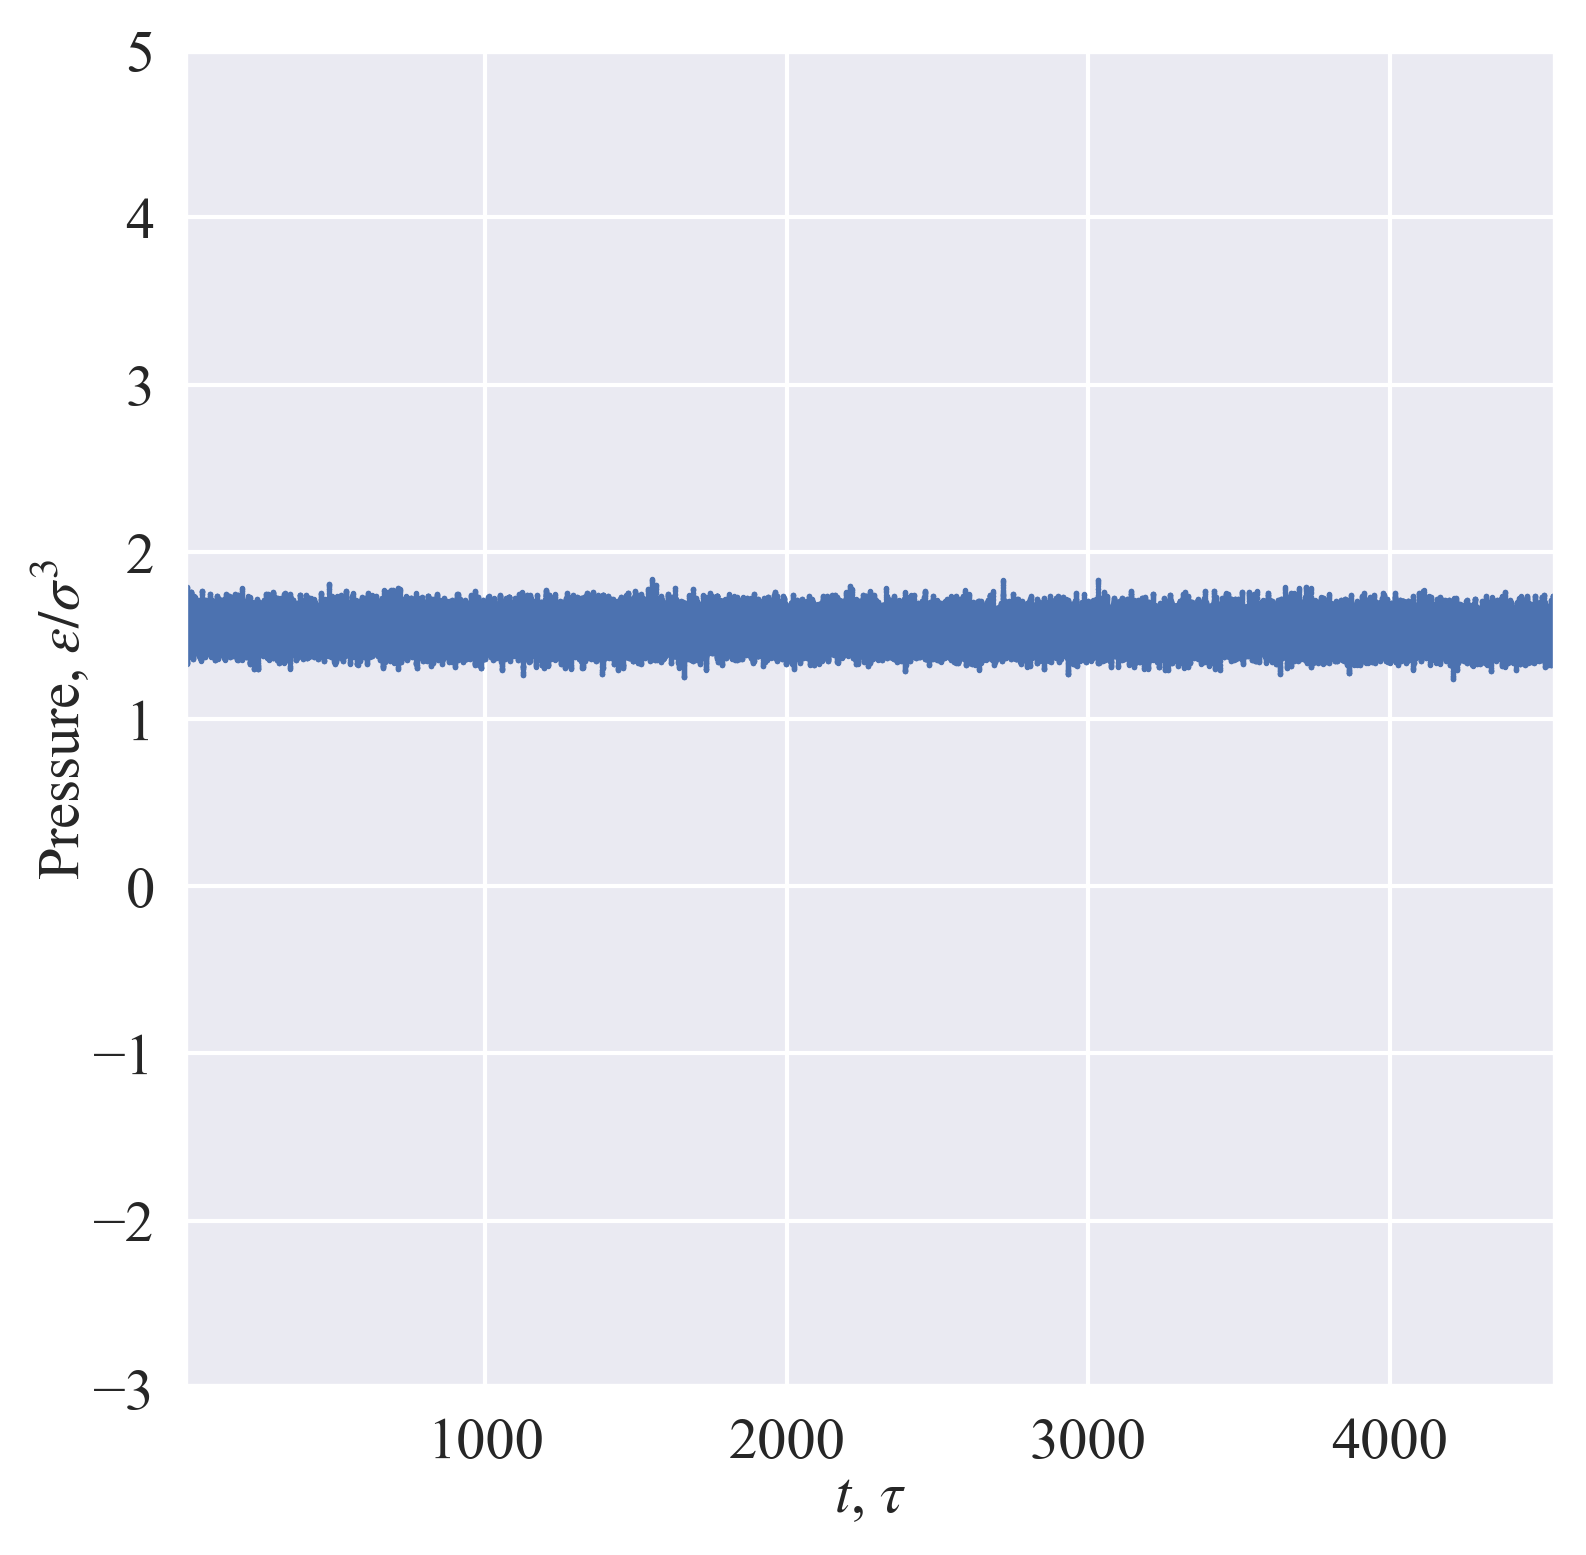

In [18]:
pp.plot_system_parameters(
    column_names=['pressure',],
    y_label=r'Pressure, $\epsilon / \sigma^3 $',
    bottom=-3,
    top=5,
);

#### Зависимость кинетической, потенциальной  и полной (внутренней) энергии системы от времени

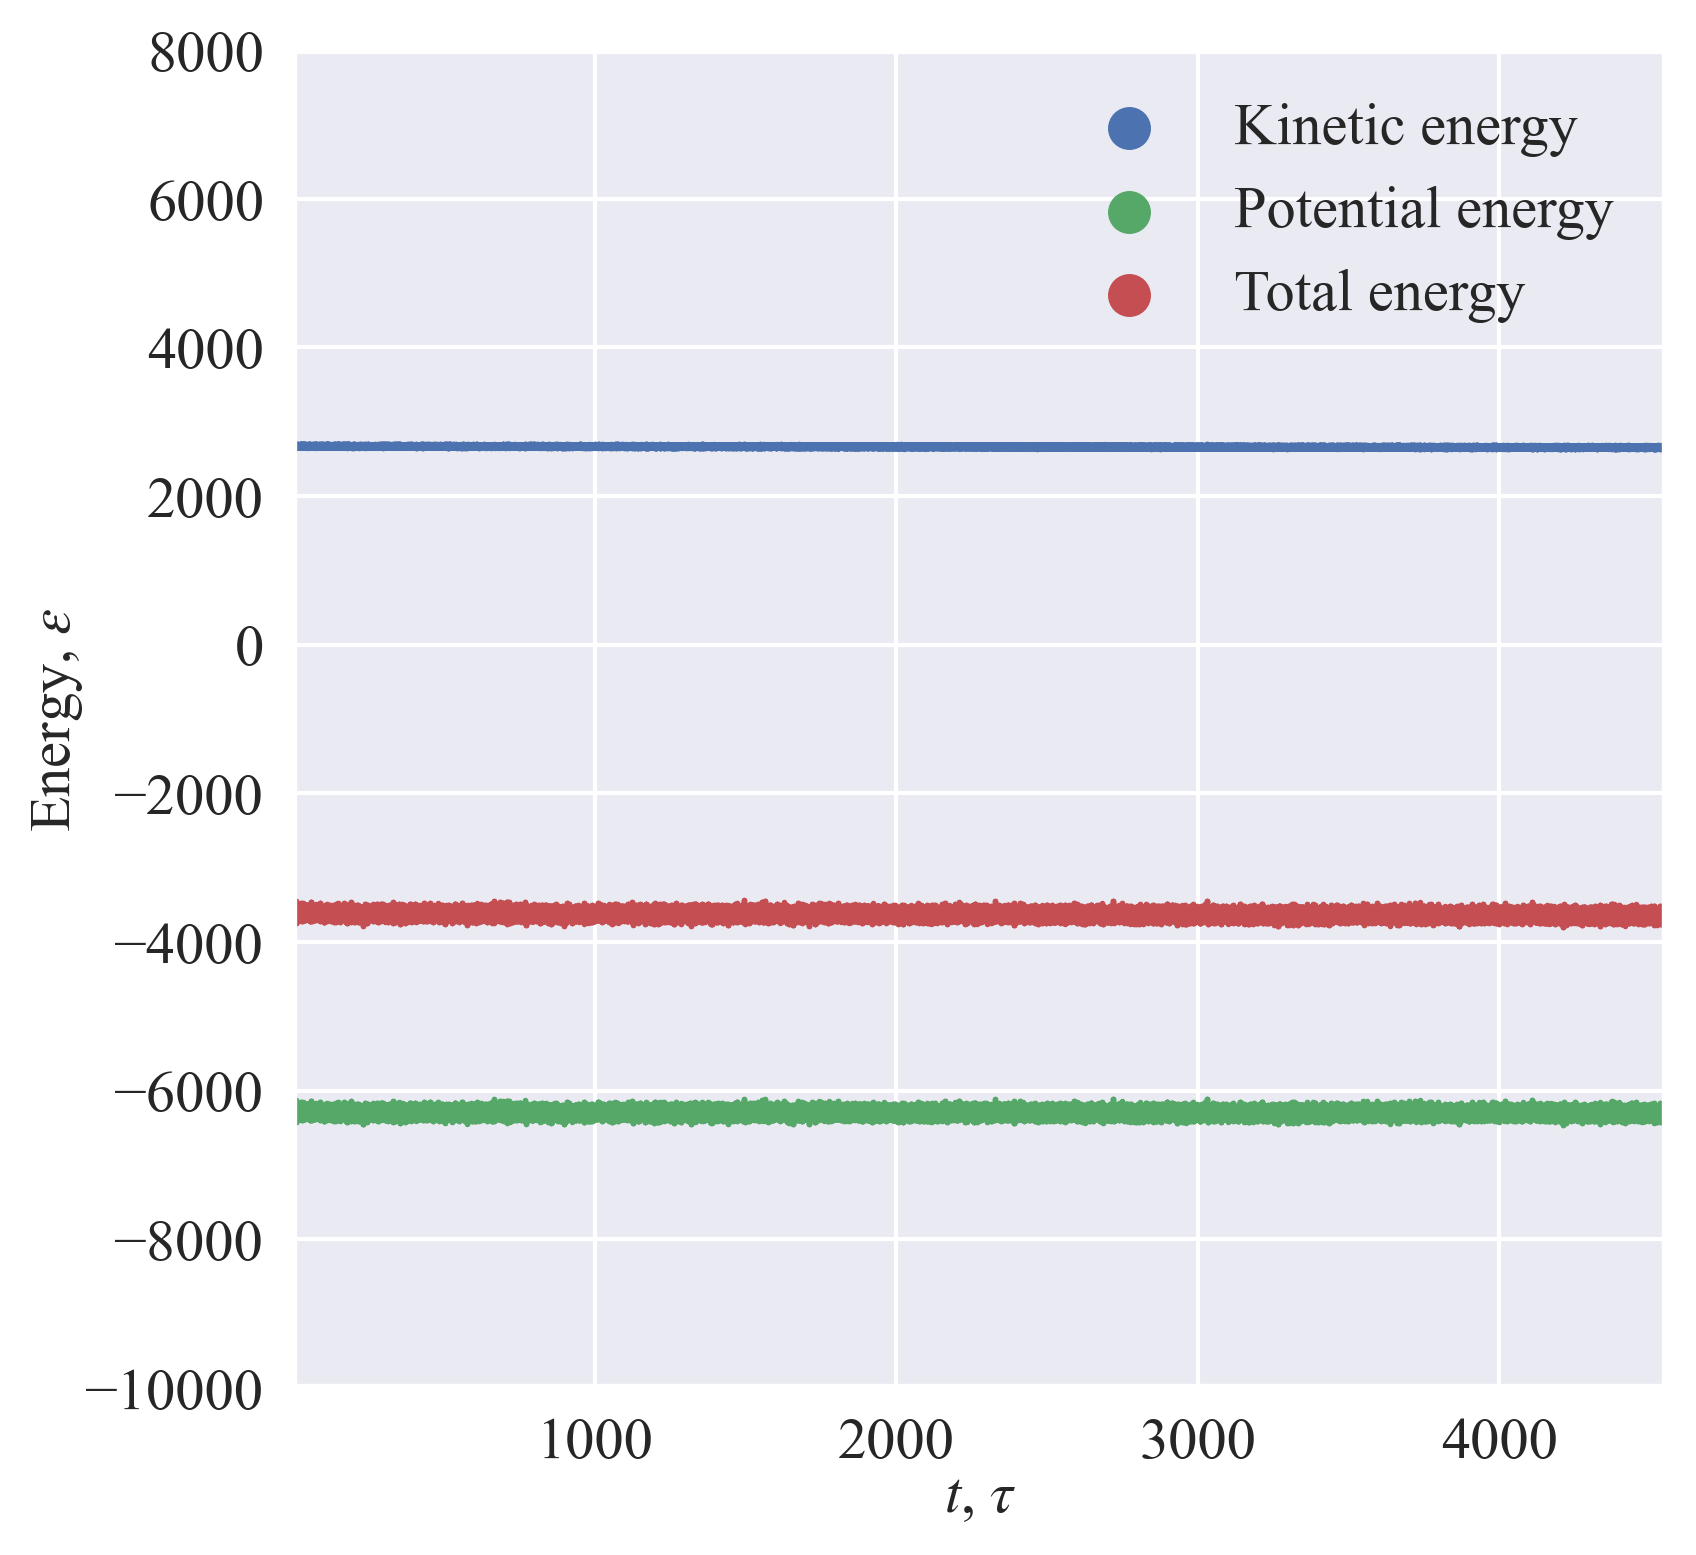

In [19]:
pp.plot_system_parameters(
    column_names=['kinetic_energy', 'potential_energy', 'total_energy'],
    y_label=r'Energy, $\epsilon$',
    bottom=-10000,
    top=8000,
    file_name_prefix='all_energies',
);

#### Вычисление термодинамических функций

In [20]:
pp.get_enthalpy();

In [21]:
pp.get_entropy();

In [22]:
pp.get_free_energy();

In [23]:
pp.get_gibbs_energy();

In [24]:
pp.system_parameters

time  temperature  pressure  kinetic_energy  potential_energy  \
0          0.200      1.30309   1.57575       2676.6045        -6266.6724   
1          0.205      1.30342   1.57576       2678.0703        -6267.3700   
2          0.210      1.30376   1.57426       2679.3528        -6268.7540   
3          0.215      1.30399   1.57099       2680.2122        -6271.4130   
4          0.220      1.30413   1.56671       2680.7834        -6274.2900   
...          ...          ...       ...             ...               ...   
910756  4553.980      1.29493   1.58093       2660.9585        -6277.4155   
910757  4553.985      1.29452   1.57777       2659.2050        -6277.7020   
910758  4553.990      1.29406   1.57648       2657.4597        -6276.3857   
910759  4553.995      1.29369   1.57711       2656.0808        -6273.2266   
910760  4554.000      1.29344   1.57869       2655.2585        -6269.6963   

        total_energy     virial  msd  diffusion     volume   enthalpy  \
0         -3590.0679  3336.7441  0.0        0.0  1838.2656   0.000000   
1         -3589.2998  3333.8813  0.0        0.0  1838.2656   0.786483   
2         -3589.4011  3323.0112  0.0        0.0  1838.2656  -2.072216   
3         -3591.2010  3303.2417  0.0        0.0  1838.2656  -9.883244   
4         -3593.5066  3278.4963  0.0        0.0  1838.2656 -20.056621   
...              ...        ...  ...        ...        ...        ...   
910756    -3616.4570  3396.5650  0.0        0.0  1838.2656 -16.866884   
910757    -3618.4970  3382.6887  0.0        0.0  1838.2656 -24.715803   
910758    -3618.9260  3379.0688  0.0        0.0  1838.2656 -27.516166   
910759    -3617.1458  3385.2790  0.0        0.0  1838.2656 -24.577859   
910760    -3614.4377  3395.6301  0.0        0.0  1838.2656 -18.965299   

            entropy  free_energy  gibbs_energy  
0          0.000000     0.000000      0.000000  
1          0.589296    -0.000194      0.018188  
2          0.511598    -0.000368     -2.739384  
3         -0.868704    -0.000169     -8.750313  
4         -2.636626     0.000201    -16.617721  
...             ...          ...           ...  
910756  5560.996582 -7383.396851  -7373.874635  
910757  5559.420709 -7381.117488  -7377.404192  
910758  5559.089194 -7378.560307  -7377.218373  
910759  5560.465258 -7376.502935  -7374.002894  
910760  5562.558977 -7375.112295  -7369.707794  

[910761 rows x 14 columns]

#### Зависимость энтропии системы от времени

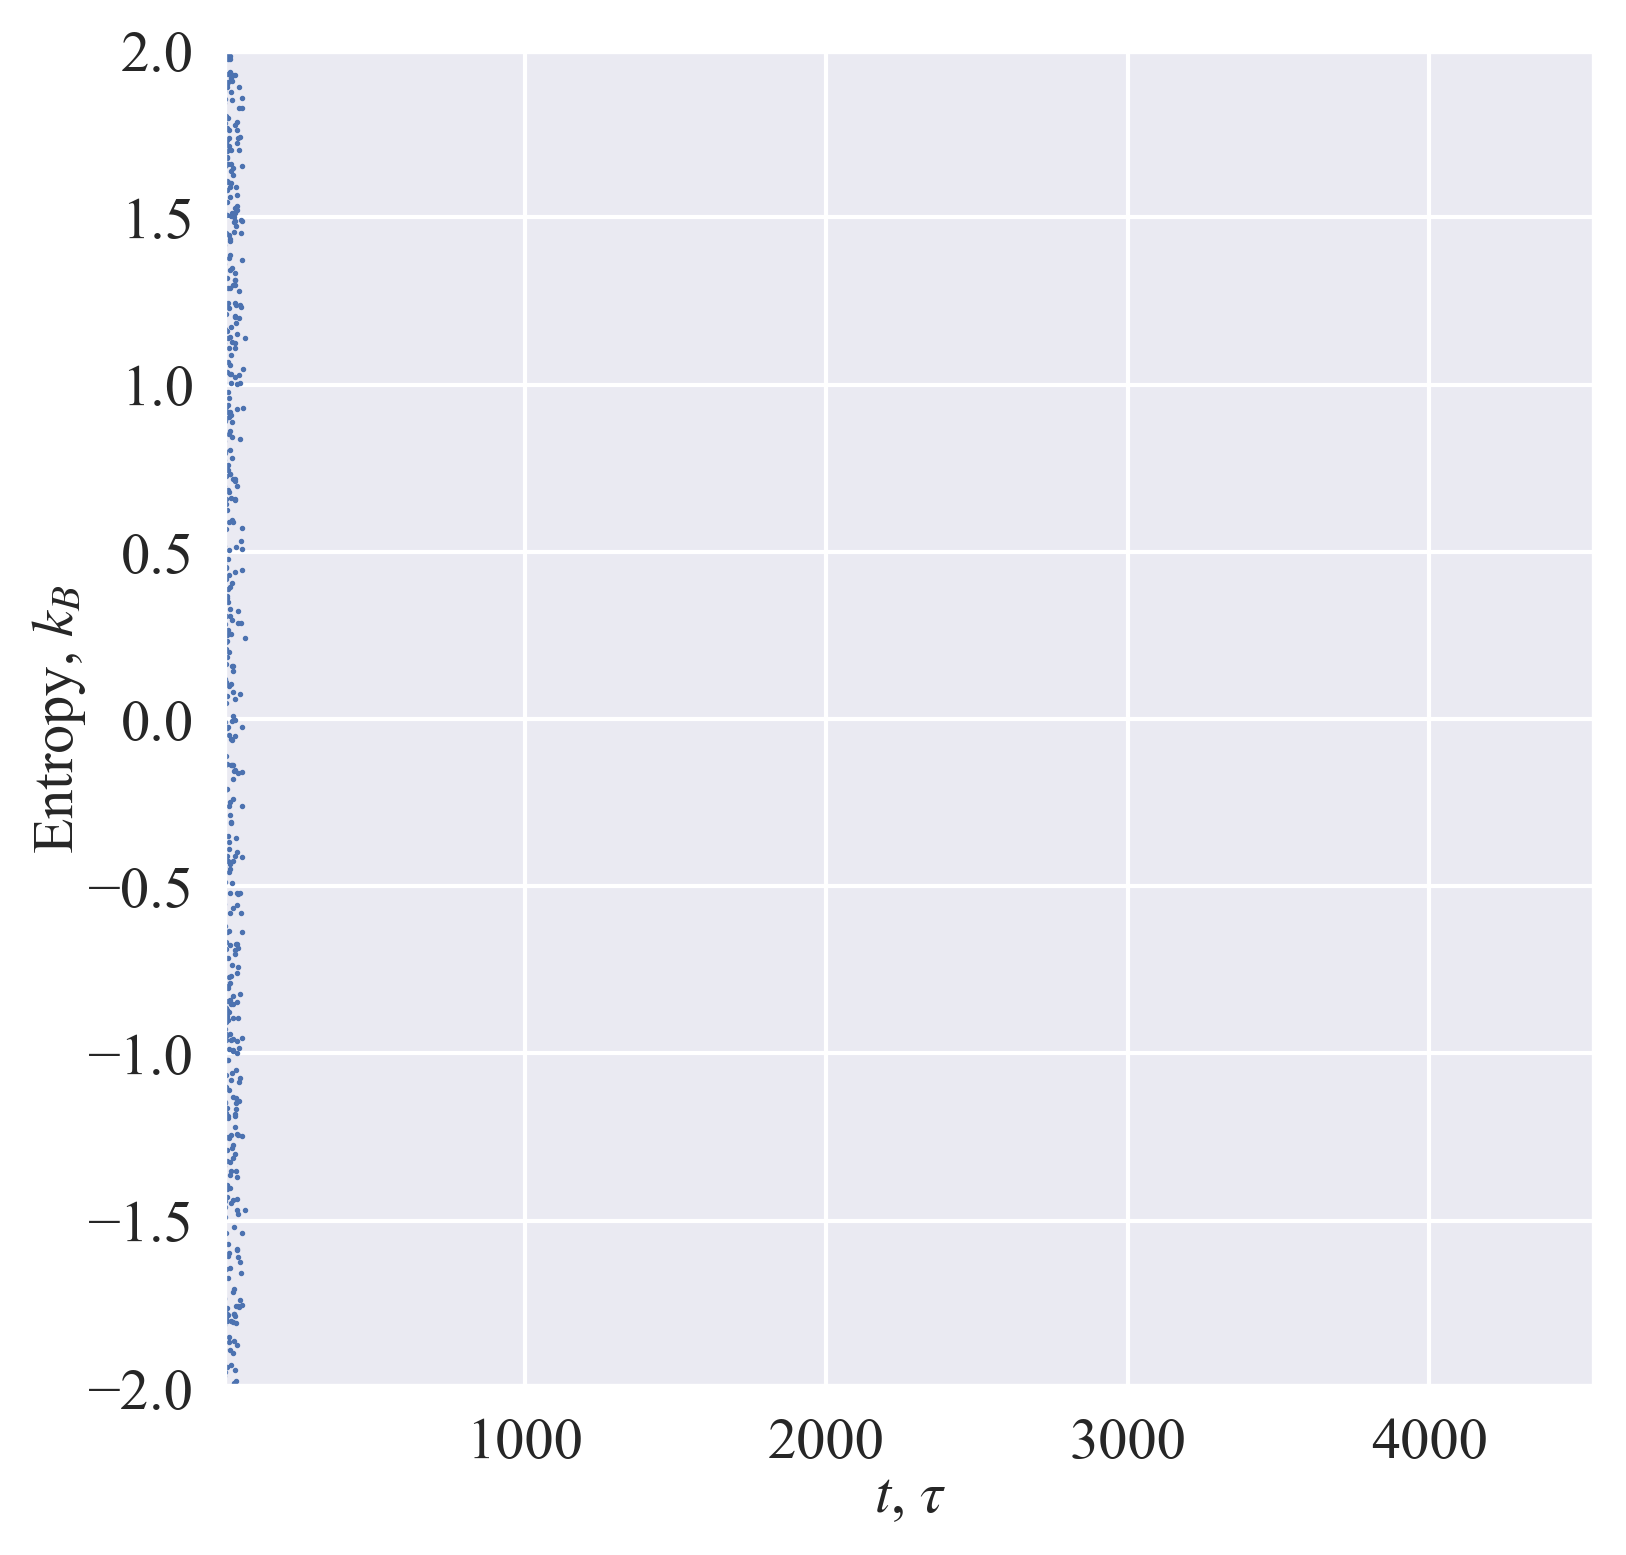

In [25]:
pp.plot_system_parameters(
    column_names=['entropy', ],
    y_label=r'Entropy, $k_B$',
    bottom=-2,
    top=2,
);

#### Зависимость энтальпии, внутренней энергии, свободной энергии Гельмгольца и энергии Гиббса от времени

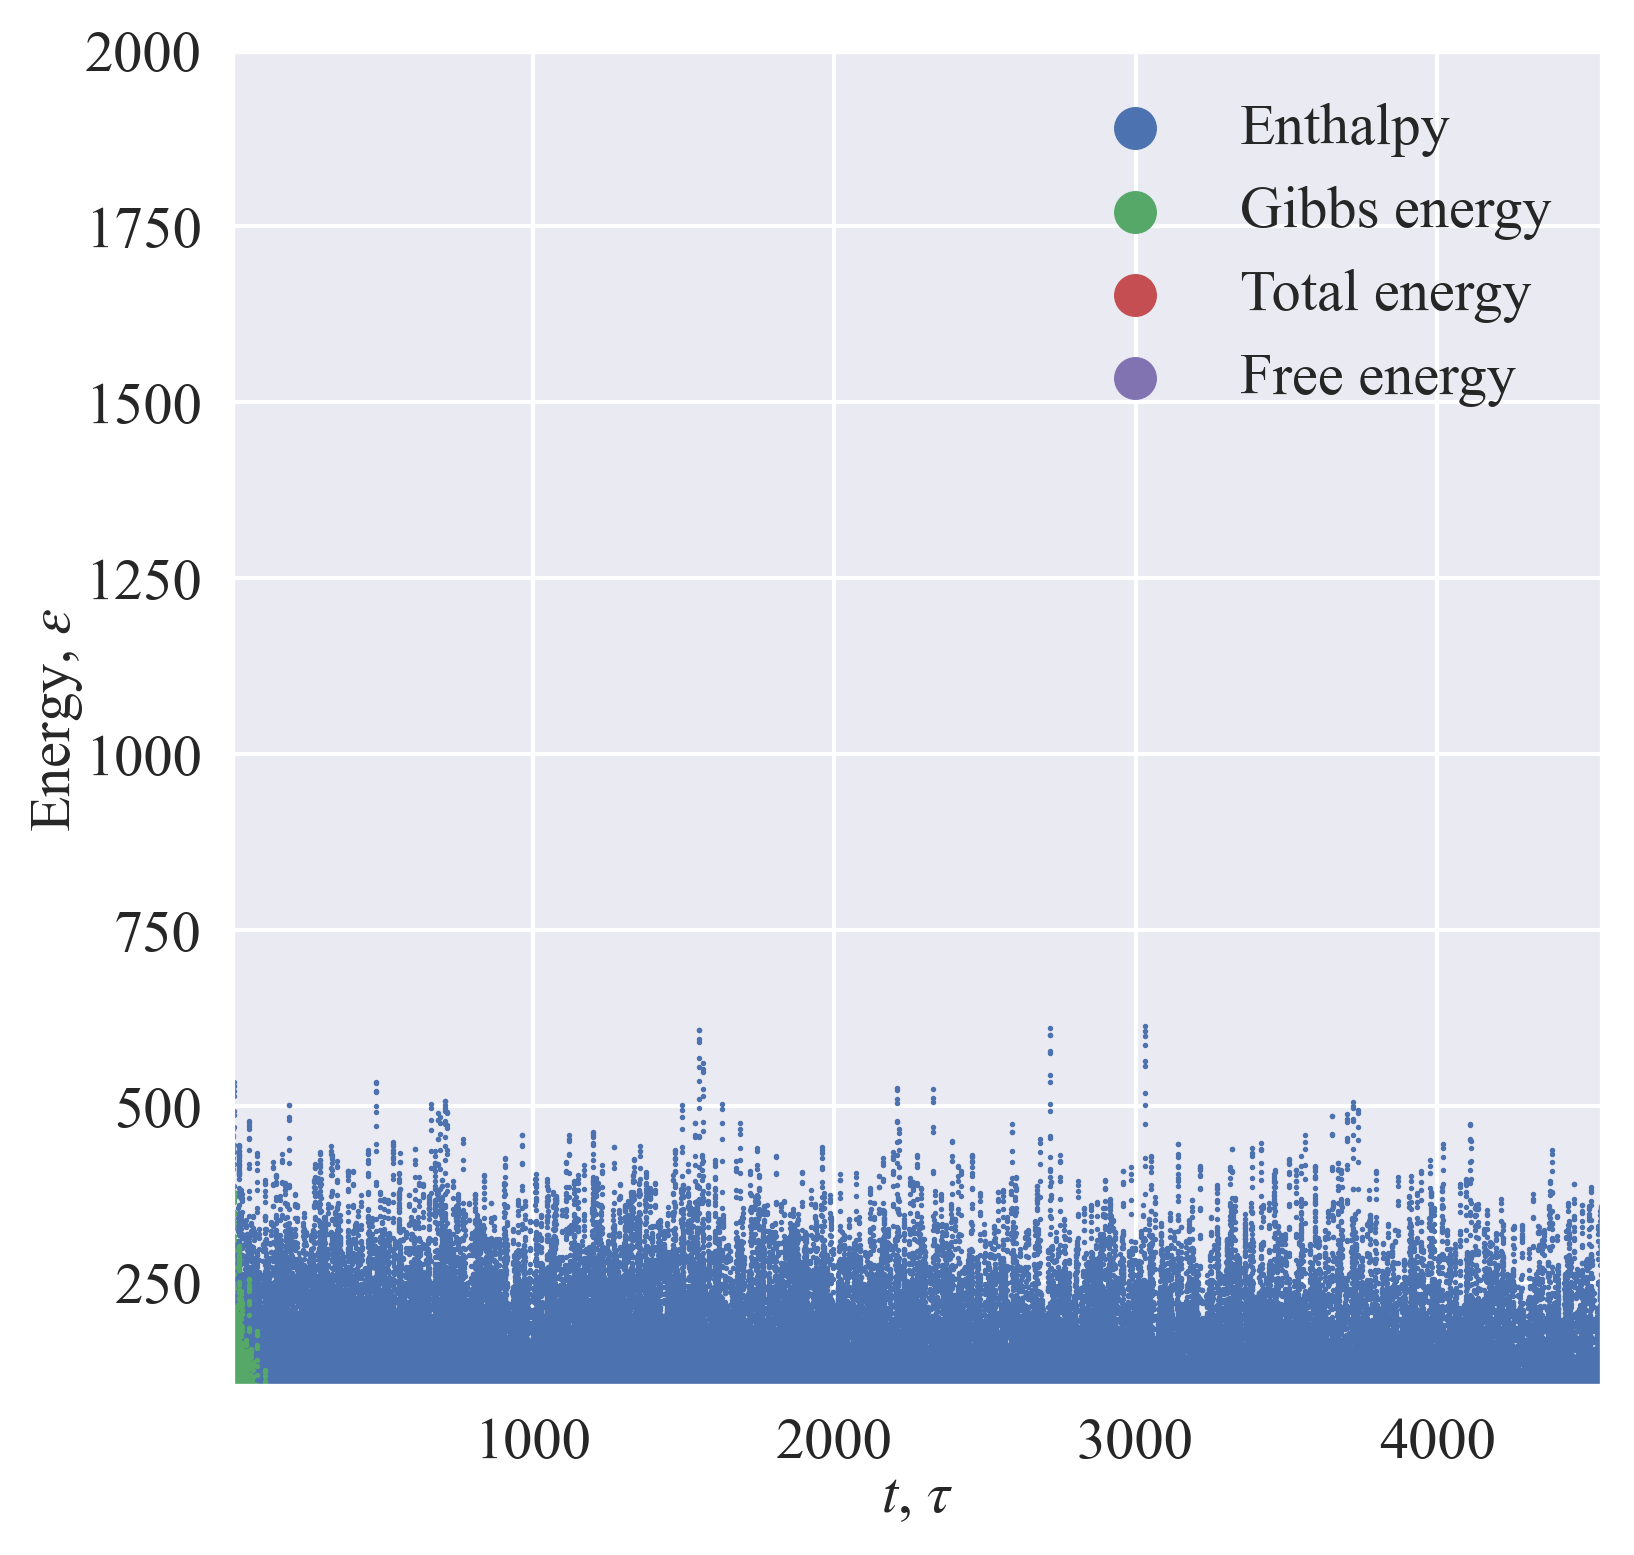

In [26]:
pp.plot_system_parameters(
    column_names=[
        'enthalpy', 
        'gibbs_energy', 
        'total_energy', 
        'free_energy',
    ],
    y_label=r'Energy, $\epsilon$',
    file_name_prefix='all_thermodynamic_functions',
    bottom=100,
    top=2000,
);

#### Зависимость внутренней энергии системы от энтропии

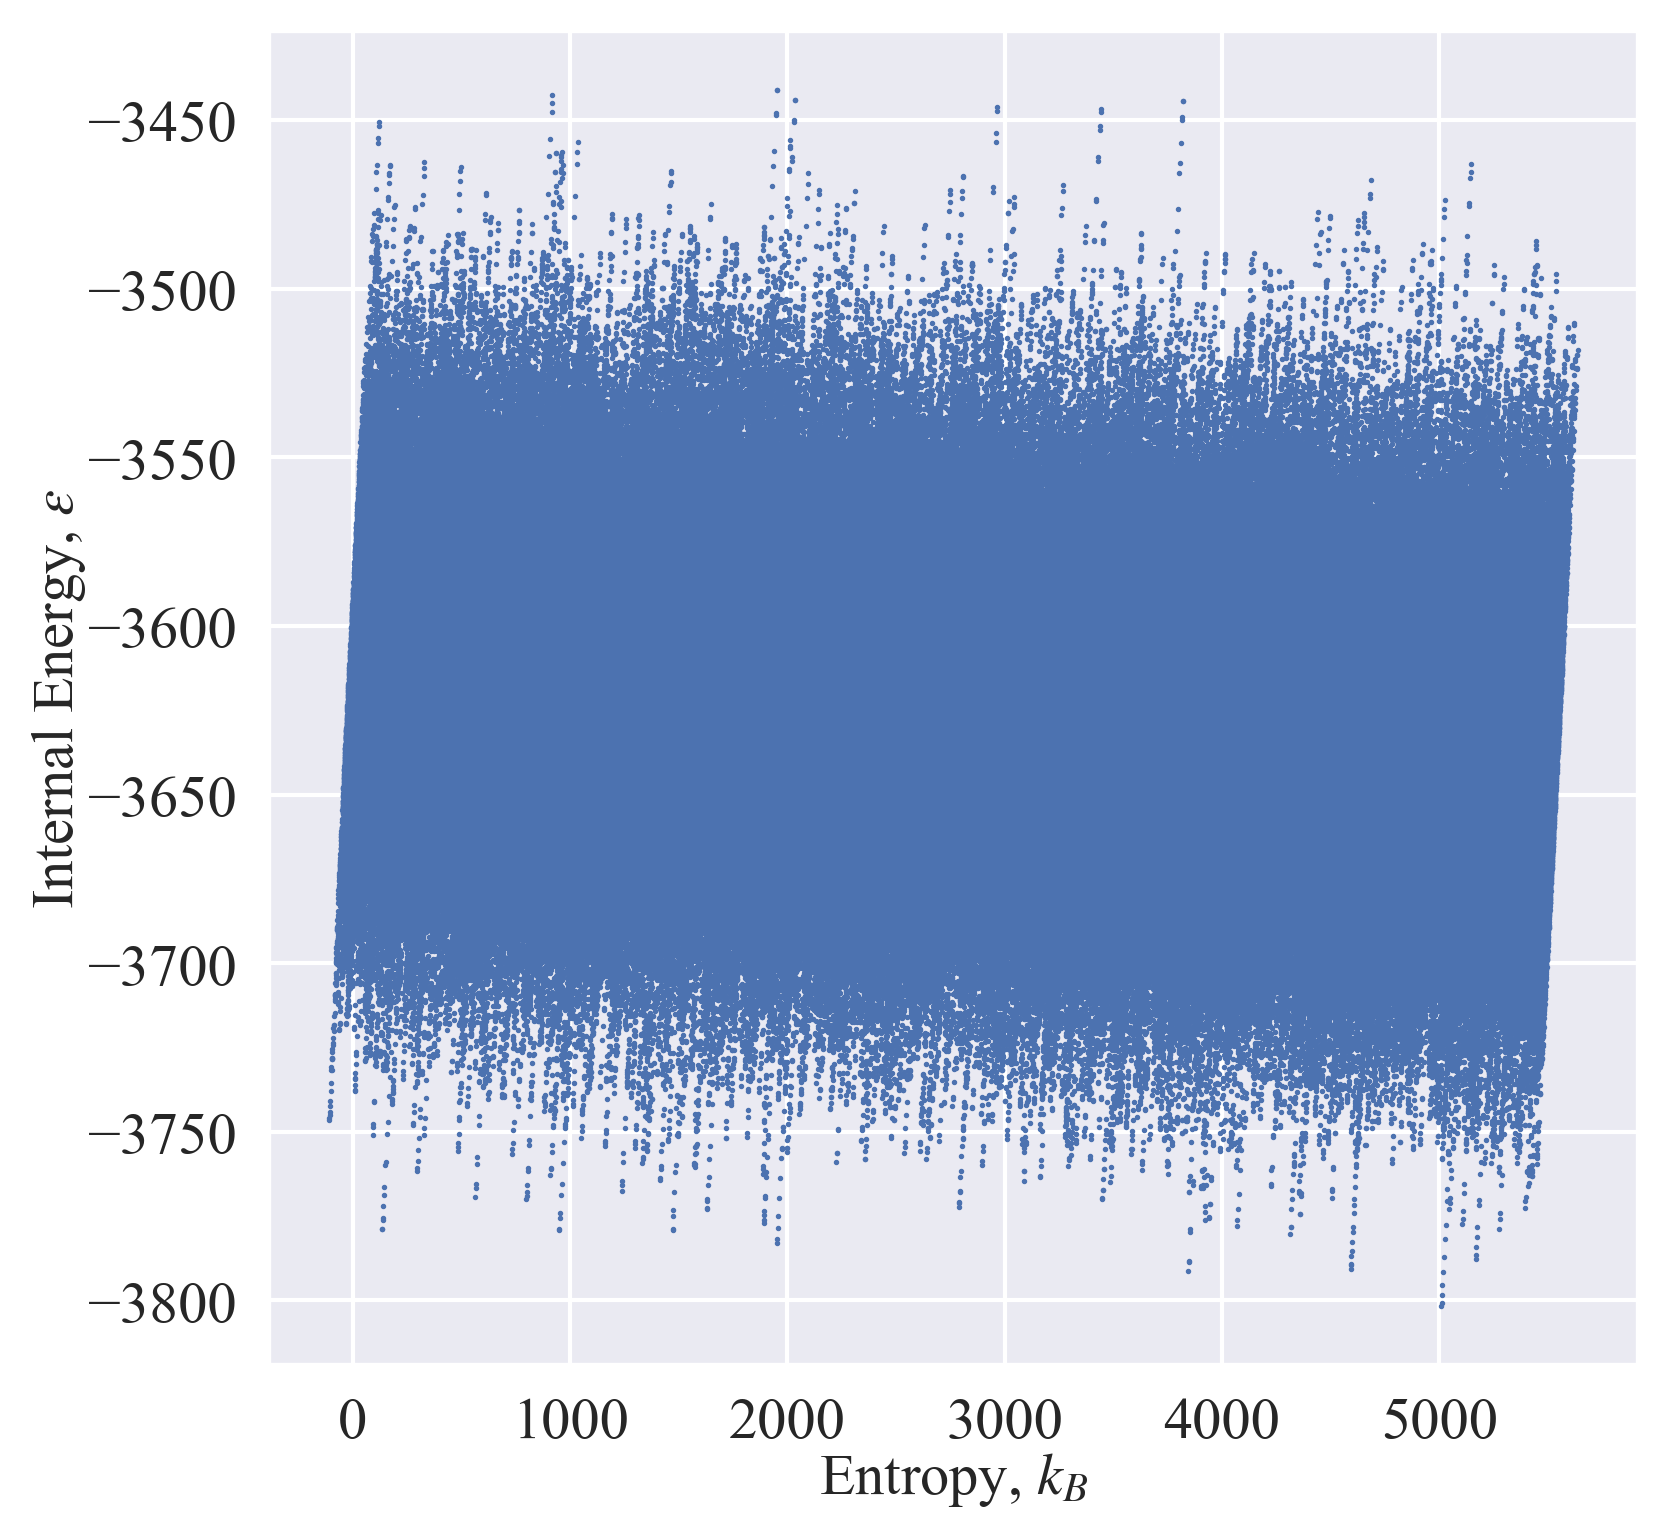

In [27]:
plt.scatter(pp.system_parameters['entropy'], pp.system_parameters['total_energy'], s=1);
plt.xlabel(r'Entropy, $k_B $',)
plt.ylabel(r'Internal Energy, $\epsilon$',)
plt.show();

#### Зависимость внутренней энергии системы от объёма

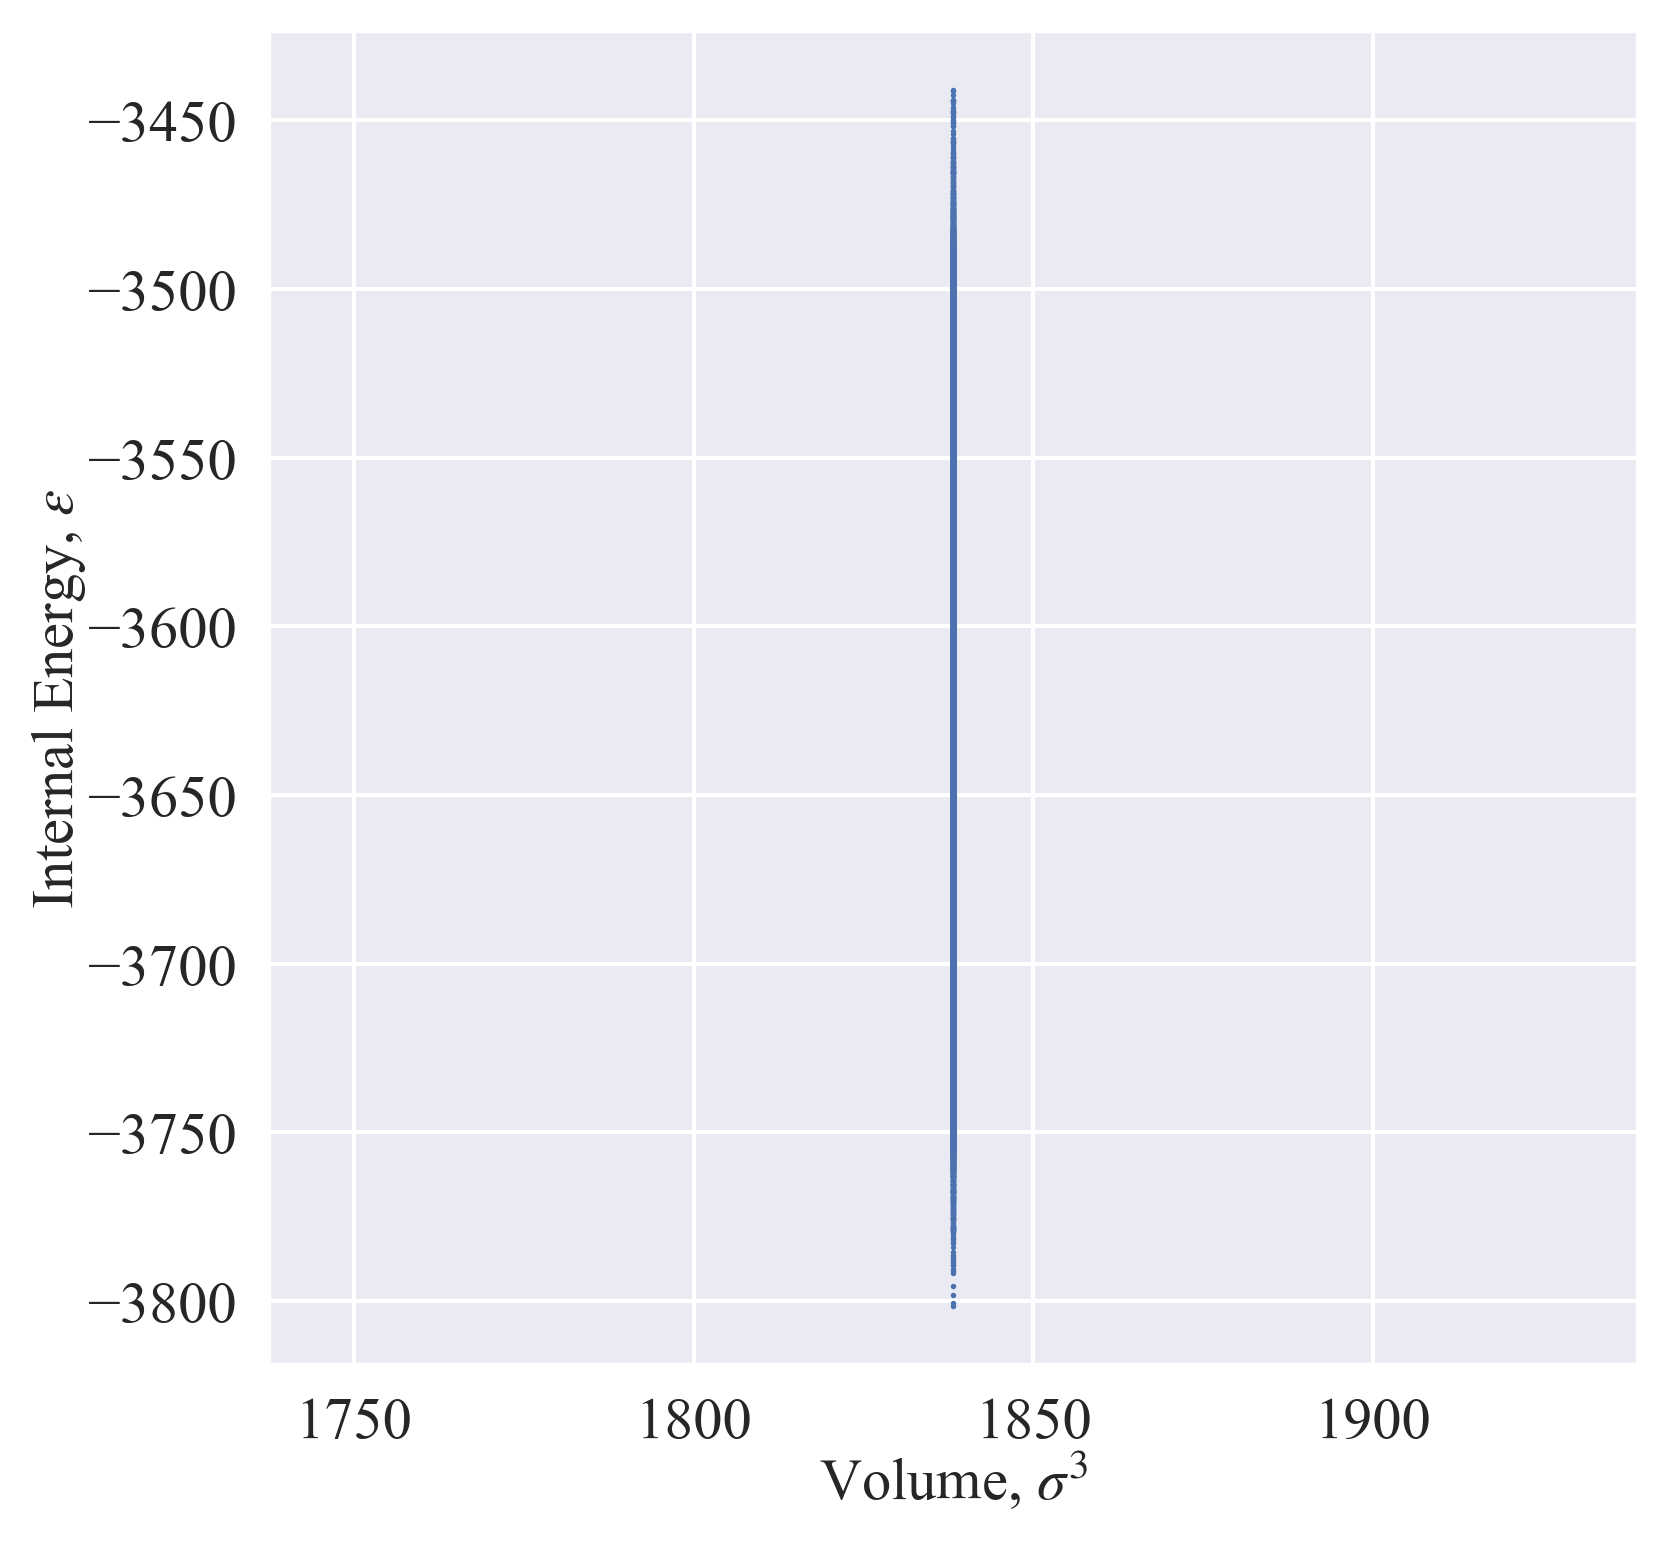

In [28]:
plt.scatter(pp.system_parameters['volume'], pp.system_parameters['total_energy'], s=1);
plt.xlabel(r'Volume, $\sigma^3 $',)
plt.ylabel(r'Internal Energy, $\epsilon$',)
plt.show();

#### Зависимость энтальпии системы от энтропии

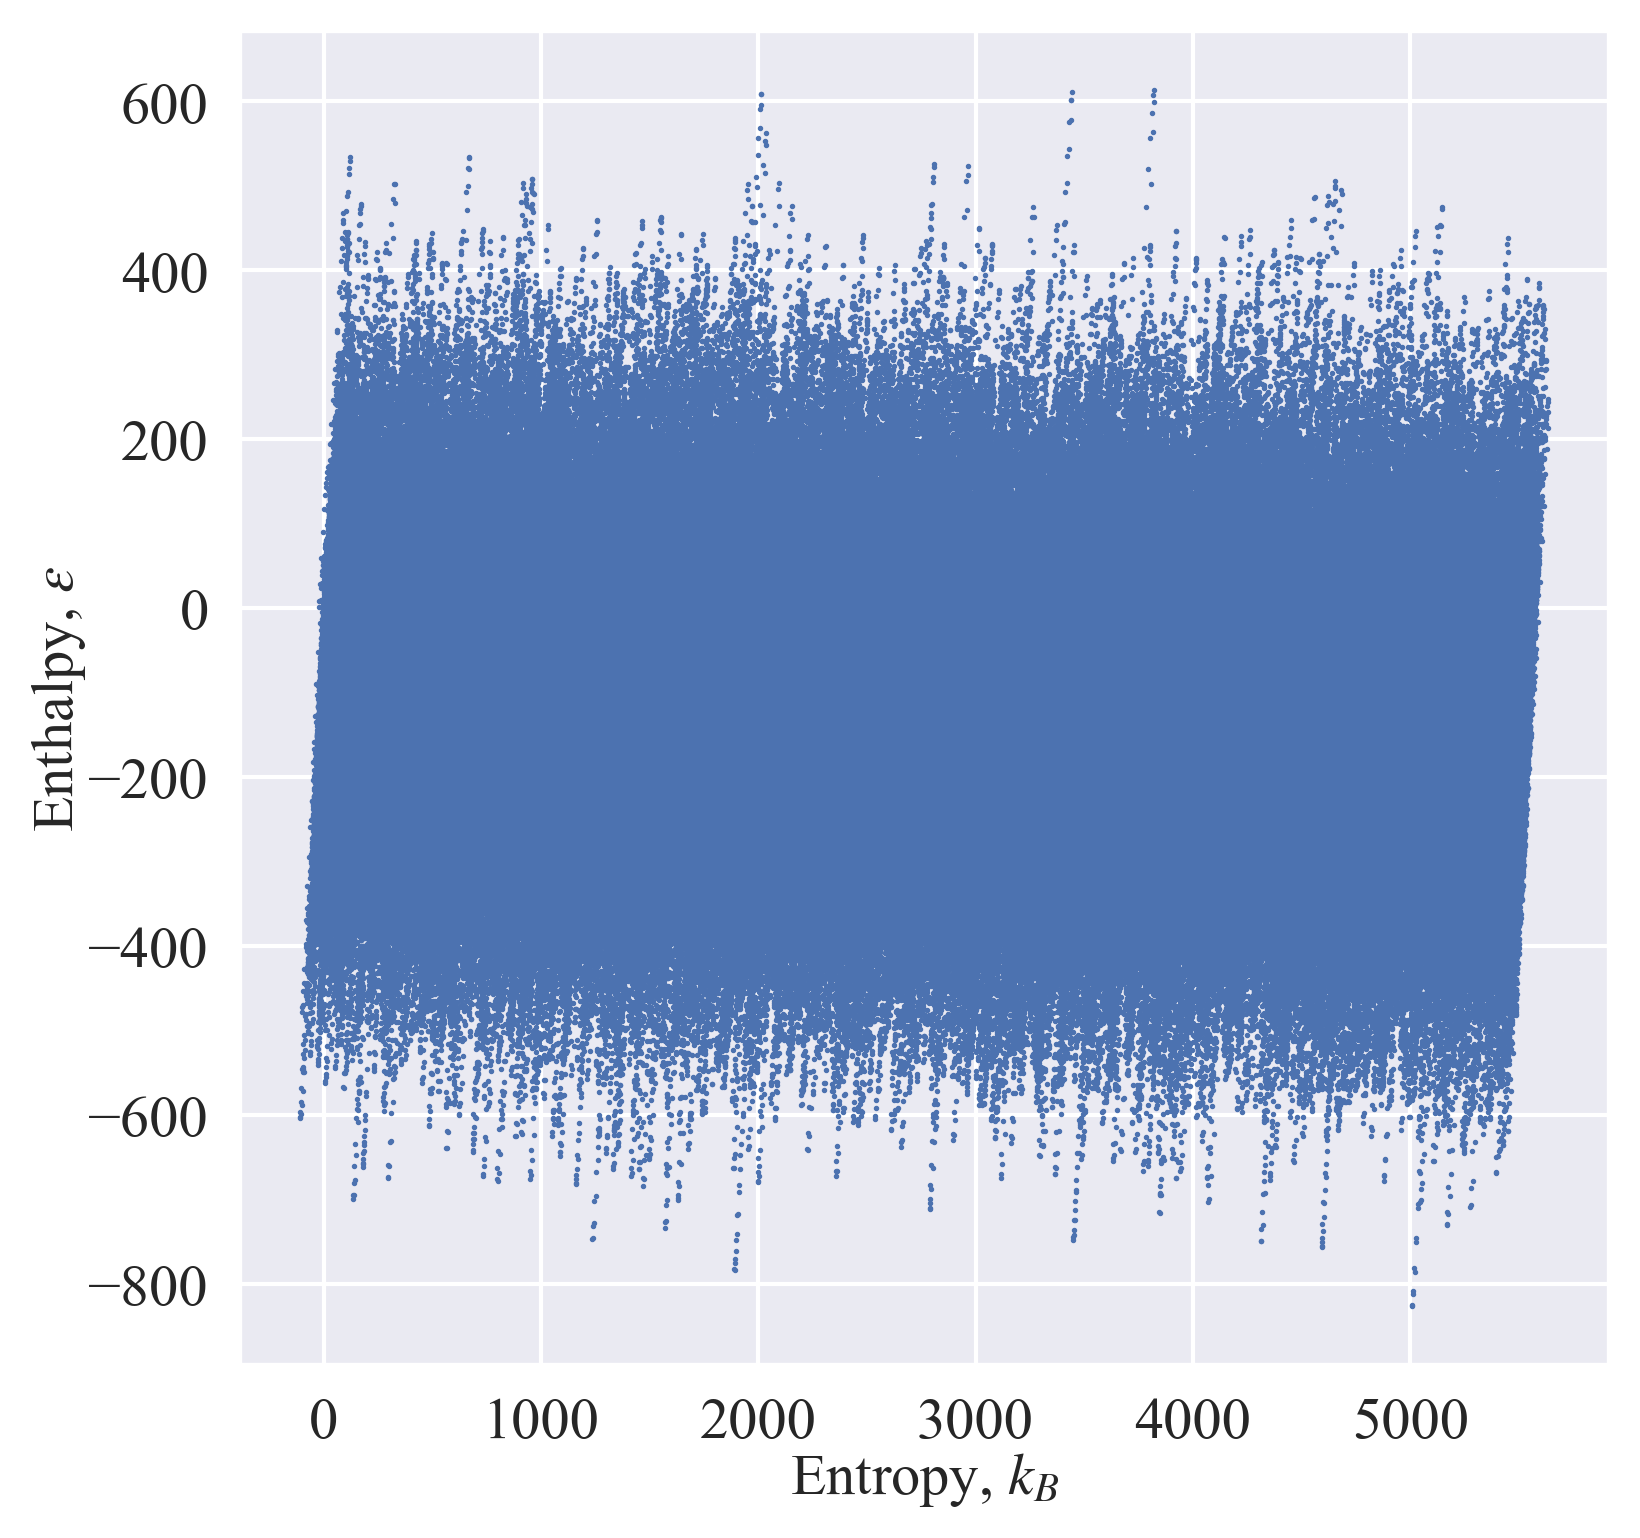

In [29]:
plt.scatter(pp.system_parameters['entropy'], pp.system_parameters['enthalpy'], s=1);
plt.xlabel(r'Entropy, $k_B $',)
plt.ylabel(r'Enthalpy, $\epsilon$',)
plt.show();

#### Зависимость энтальпии системы от давления

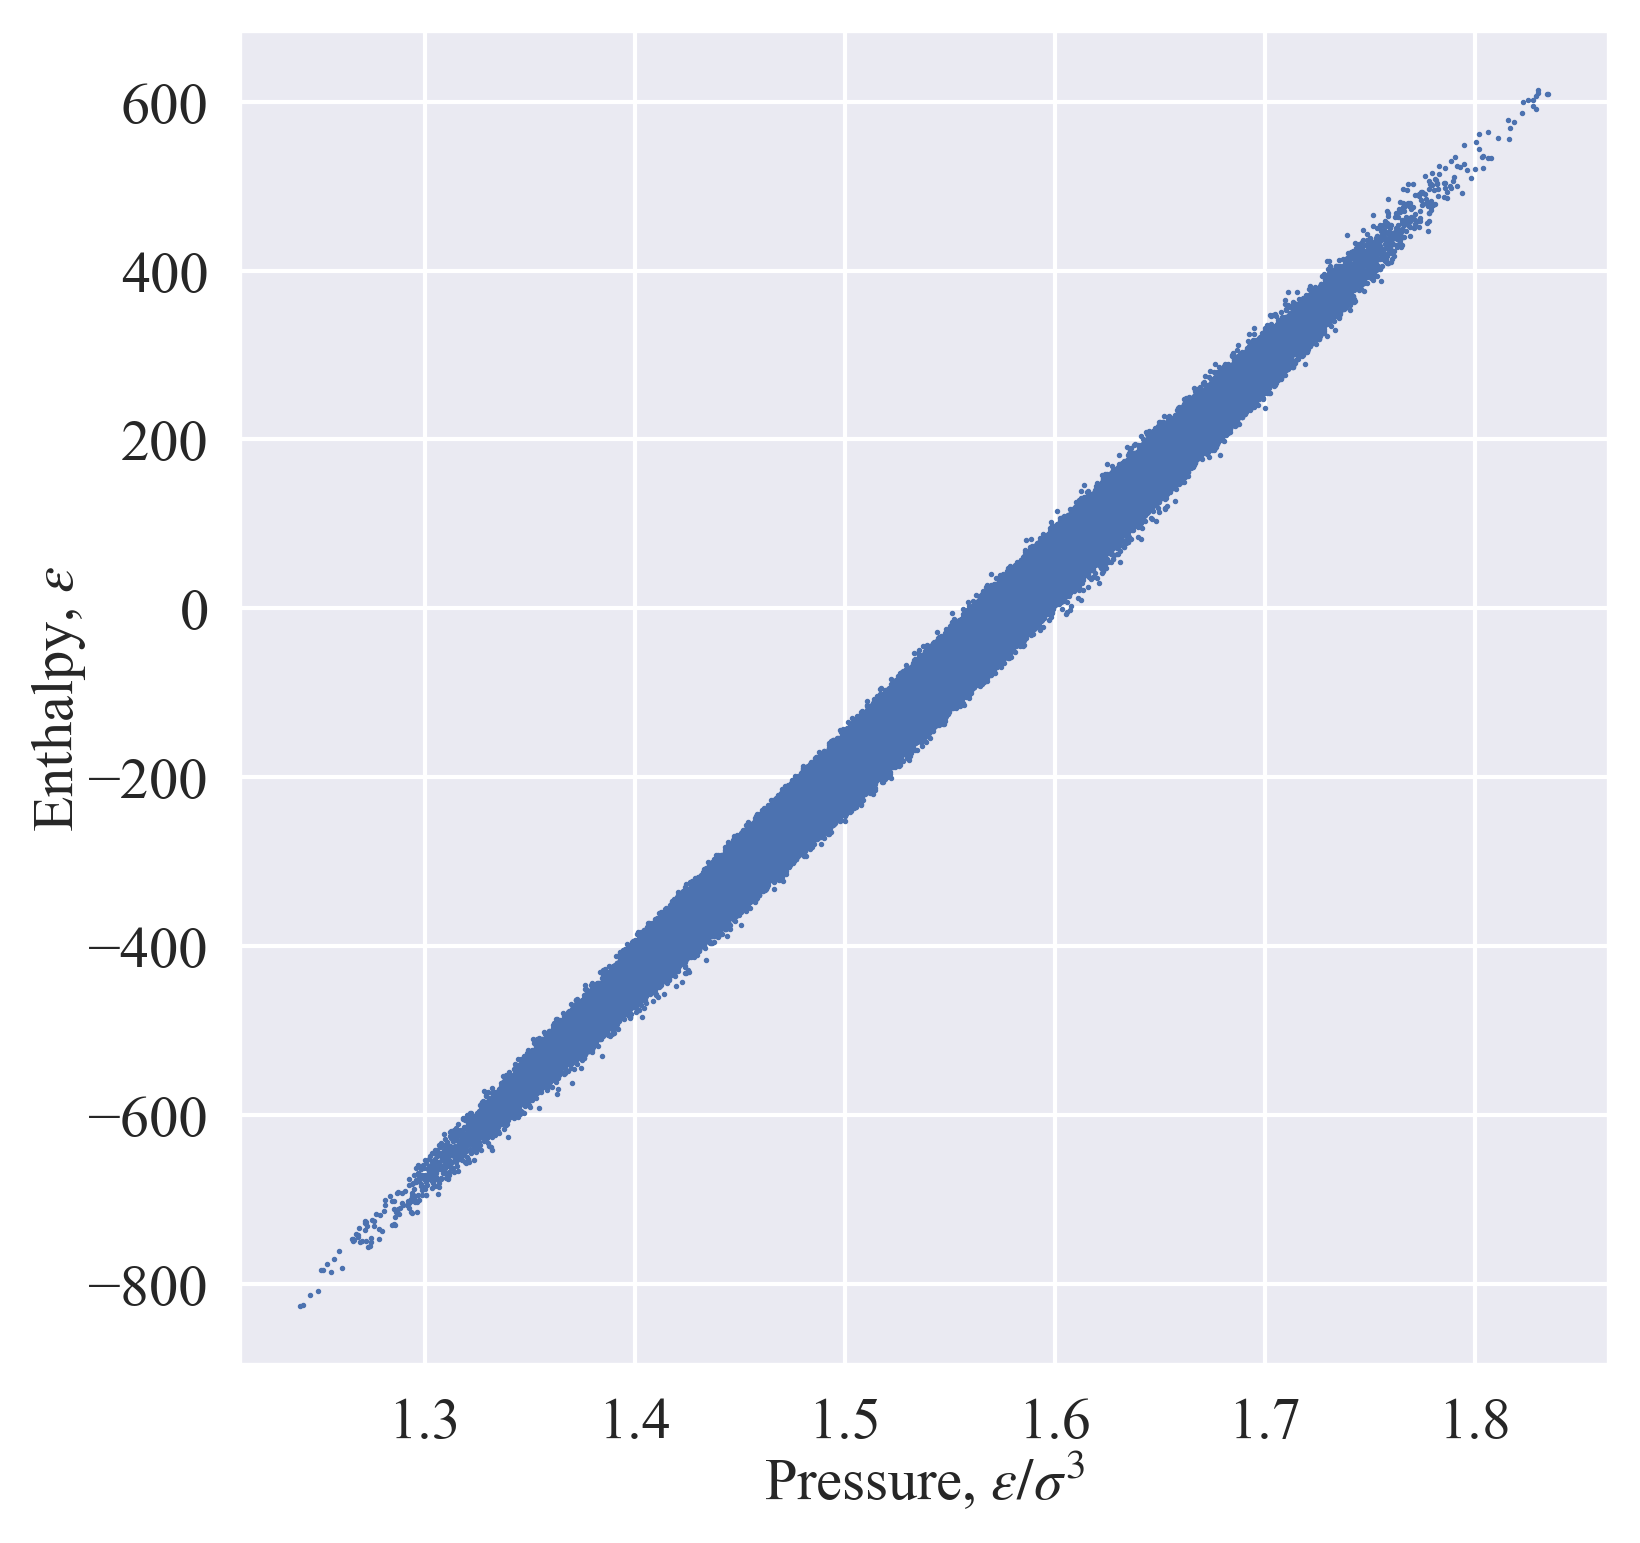

In [30]:
plt.scatter(pp.system_parameters['pressure'], pp.system_parameters['enthalpy'], s=1);
plt.xlabel(r'Pressure, $\epsilon / \sigma^3 $')
plt.ylabel(r'Enthalpy, $\epsilon$')
plt.show();

#### Зависимость свободной энергии Гельмгольца от объёма системы

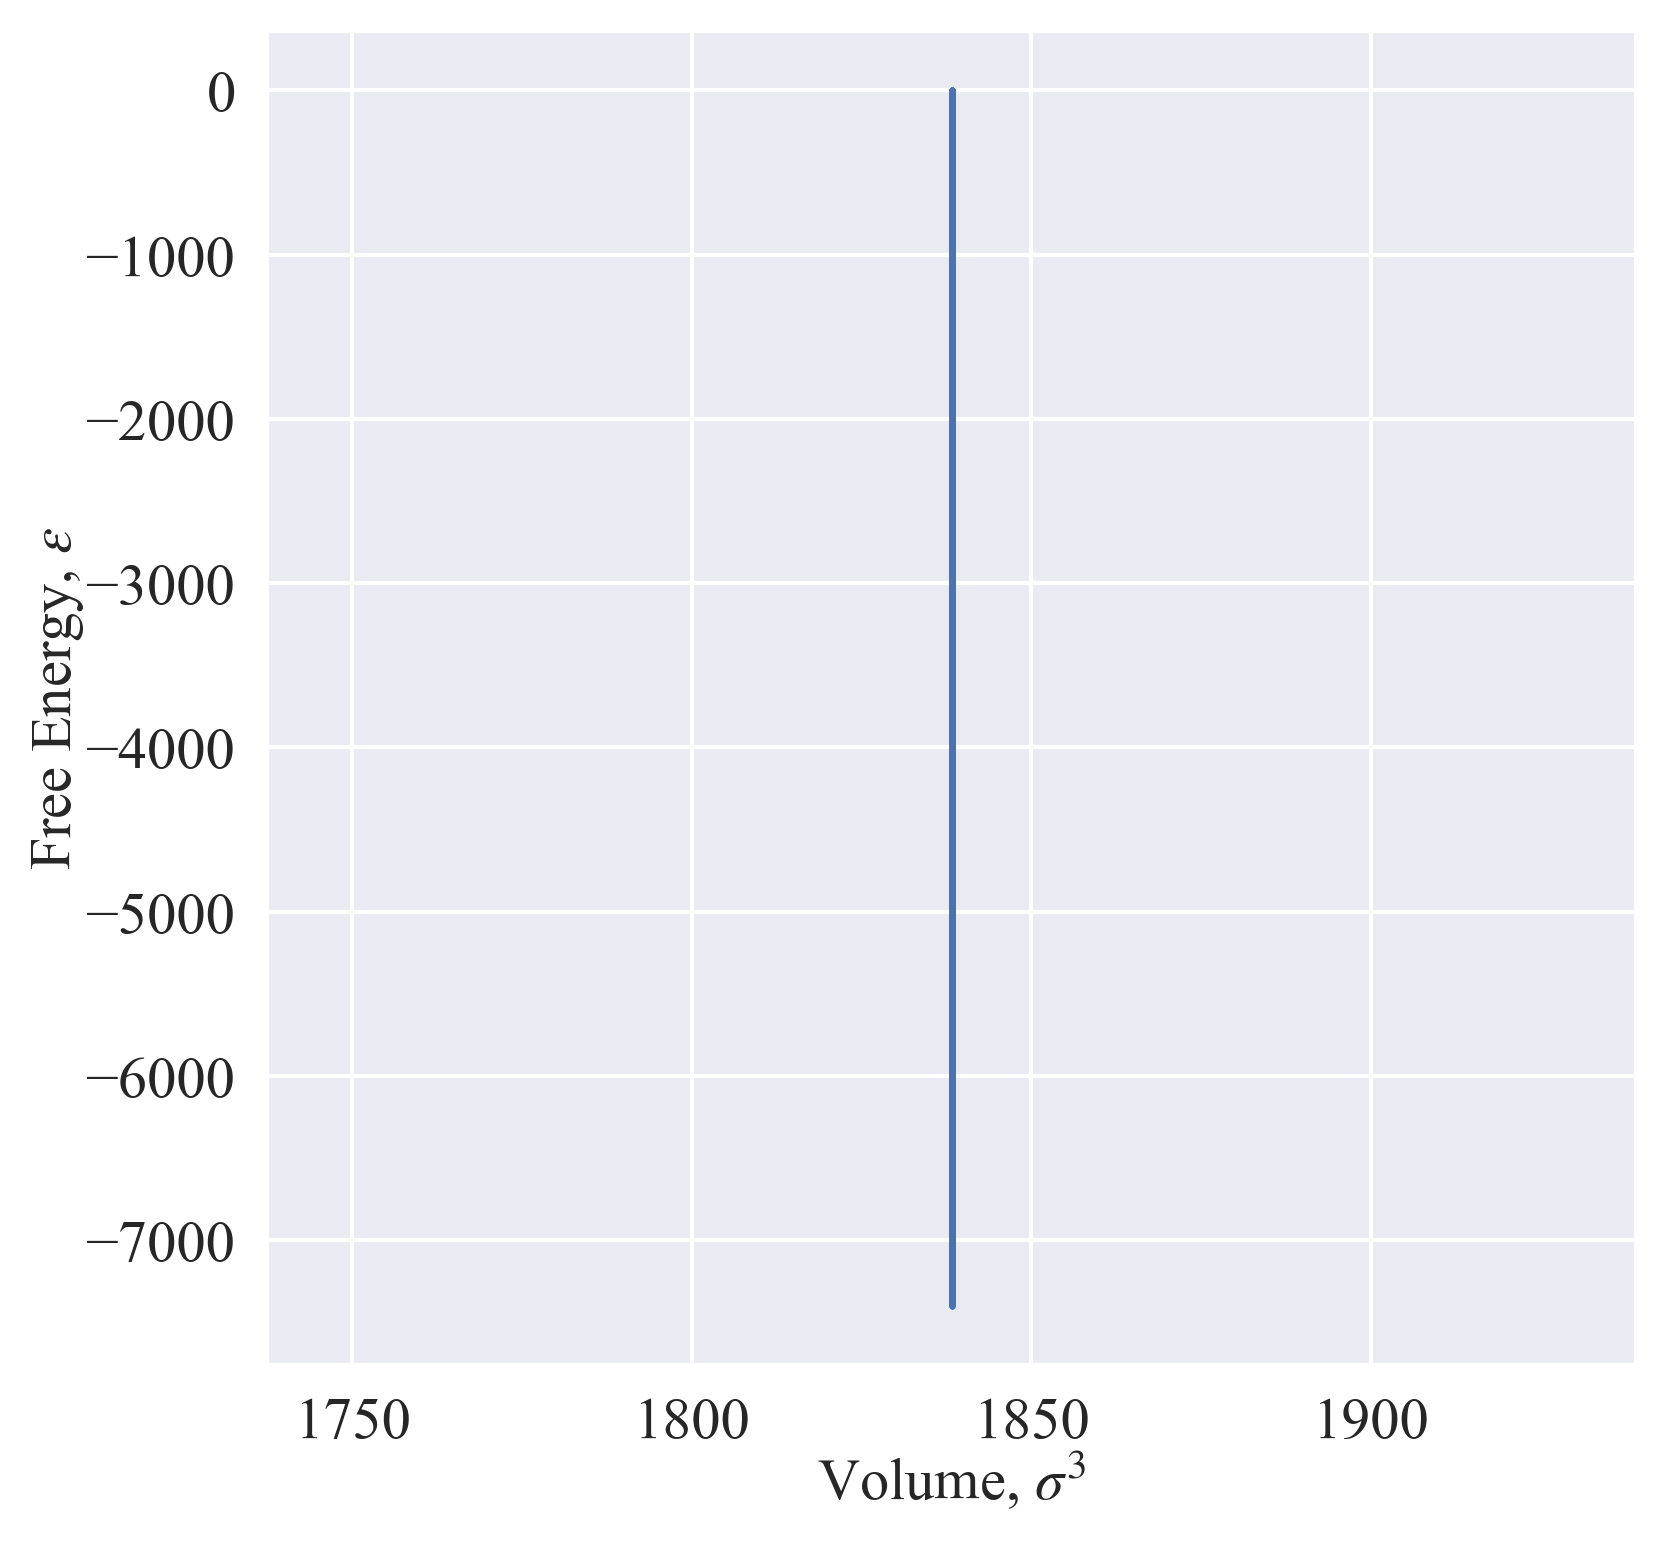

In [31]:
plt.scatter(pp.system_parameters['volume'], pp.system_parameters['free_energy'], s=1);
plt.xlabel(r'Volume, $\sigma^3 $',)
plt.ylabel(r'Free Energy, $\epsilon$',)
plt.show();

#### Зависимость свободной энергии Гельмгольца от температуры системы

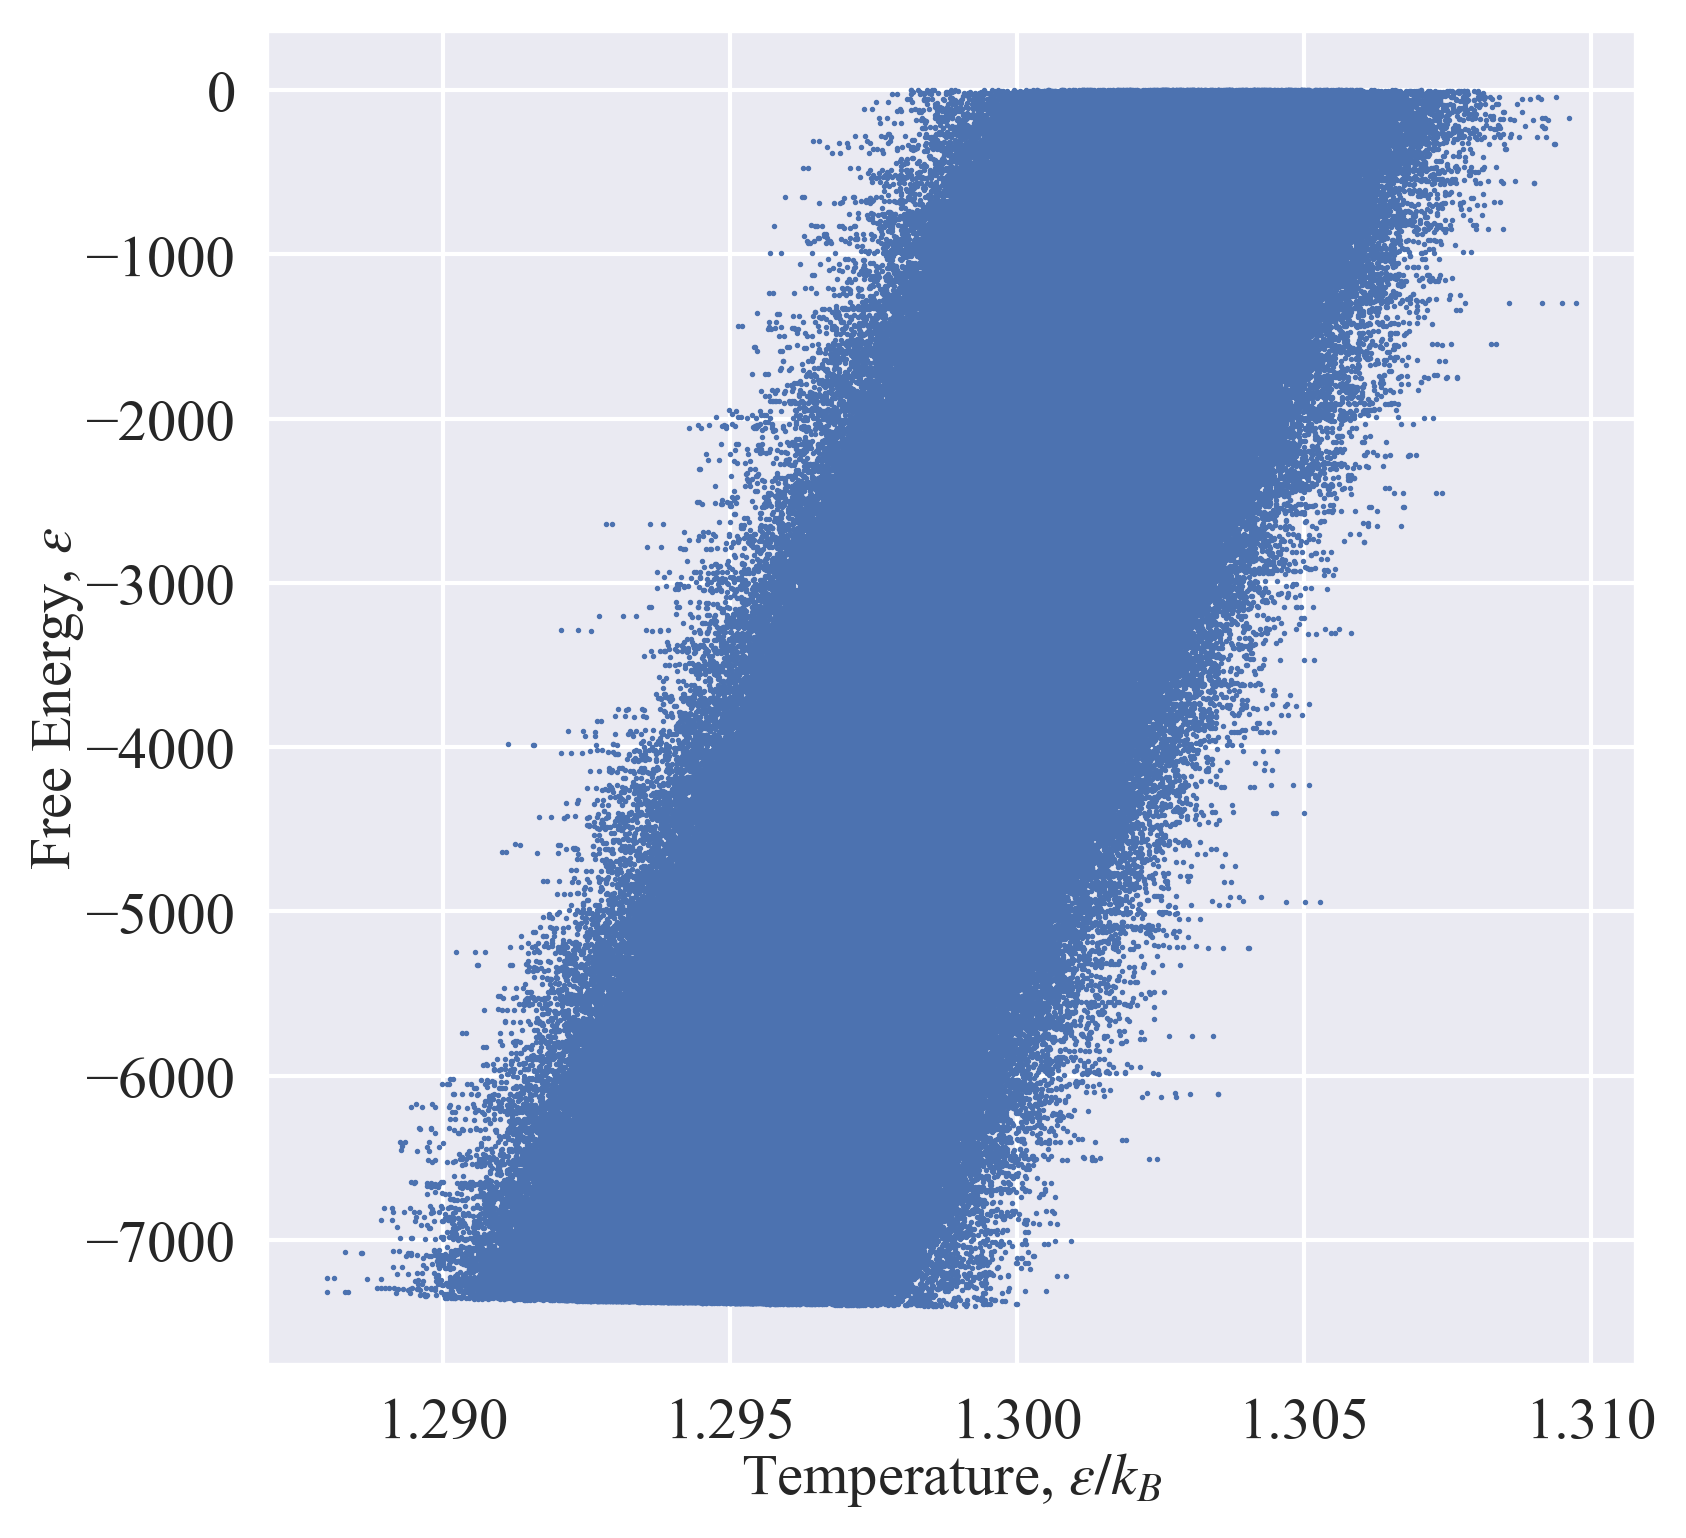

In [32]:
plt.scatter(pp.system_parameters['temperature'], pp.system_parameters['free_energy'], s=1);
plt.xlabel(r'Temperature, $\epsilon/k_B $',)
plt.ylabel(r'Free Energy, $\epsilon$',)
plt.show();

#### Зависимость энергии Гиббса от температуры системы

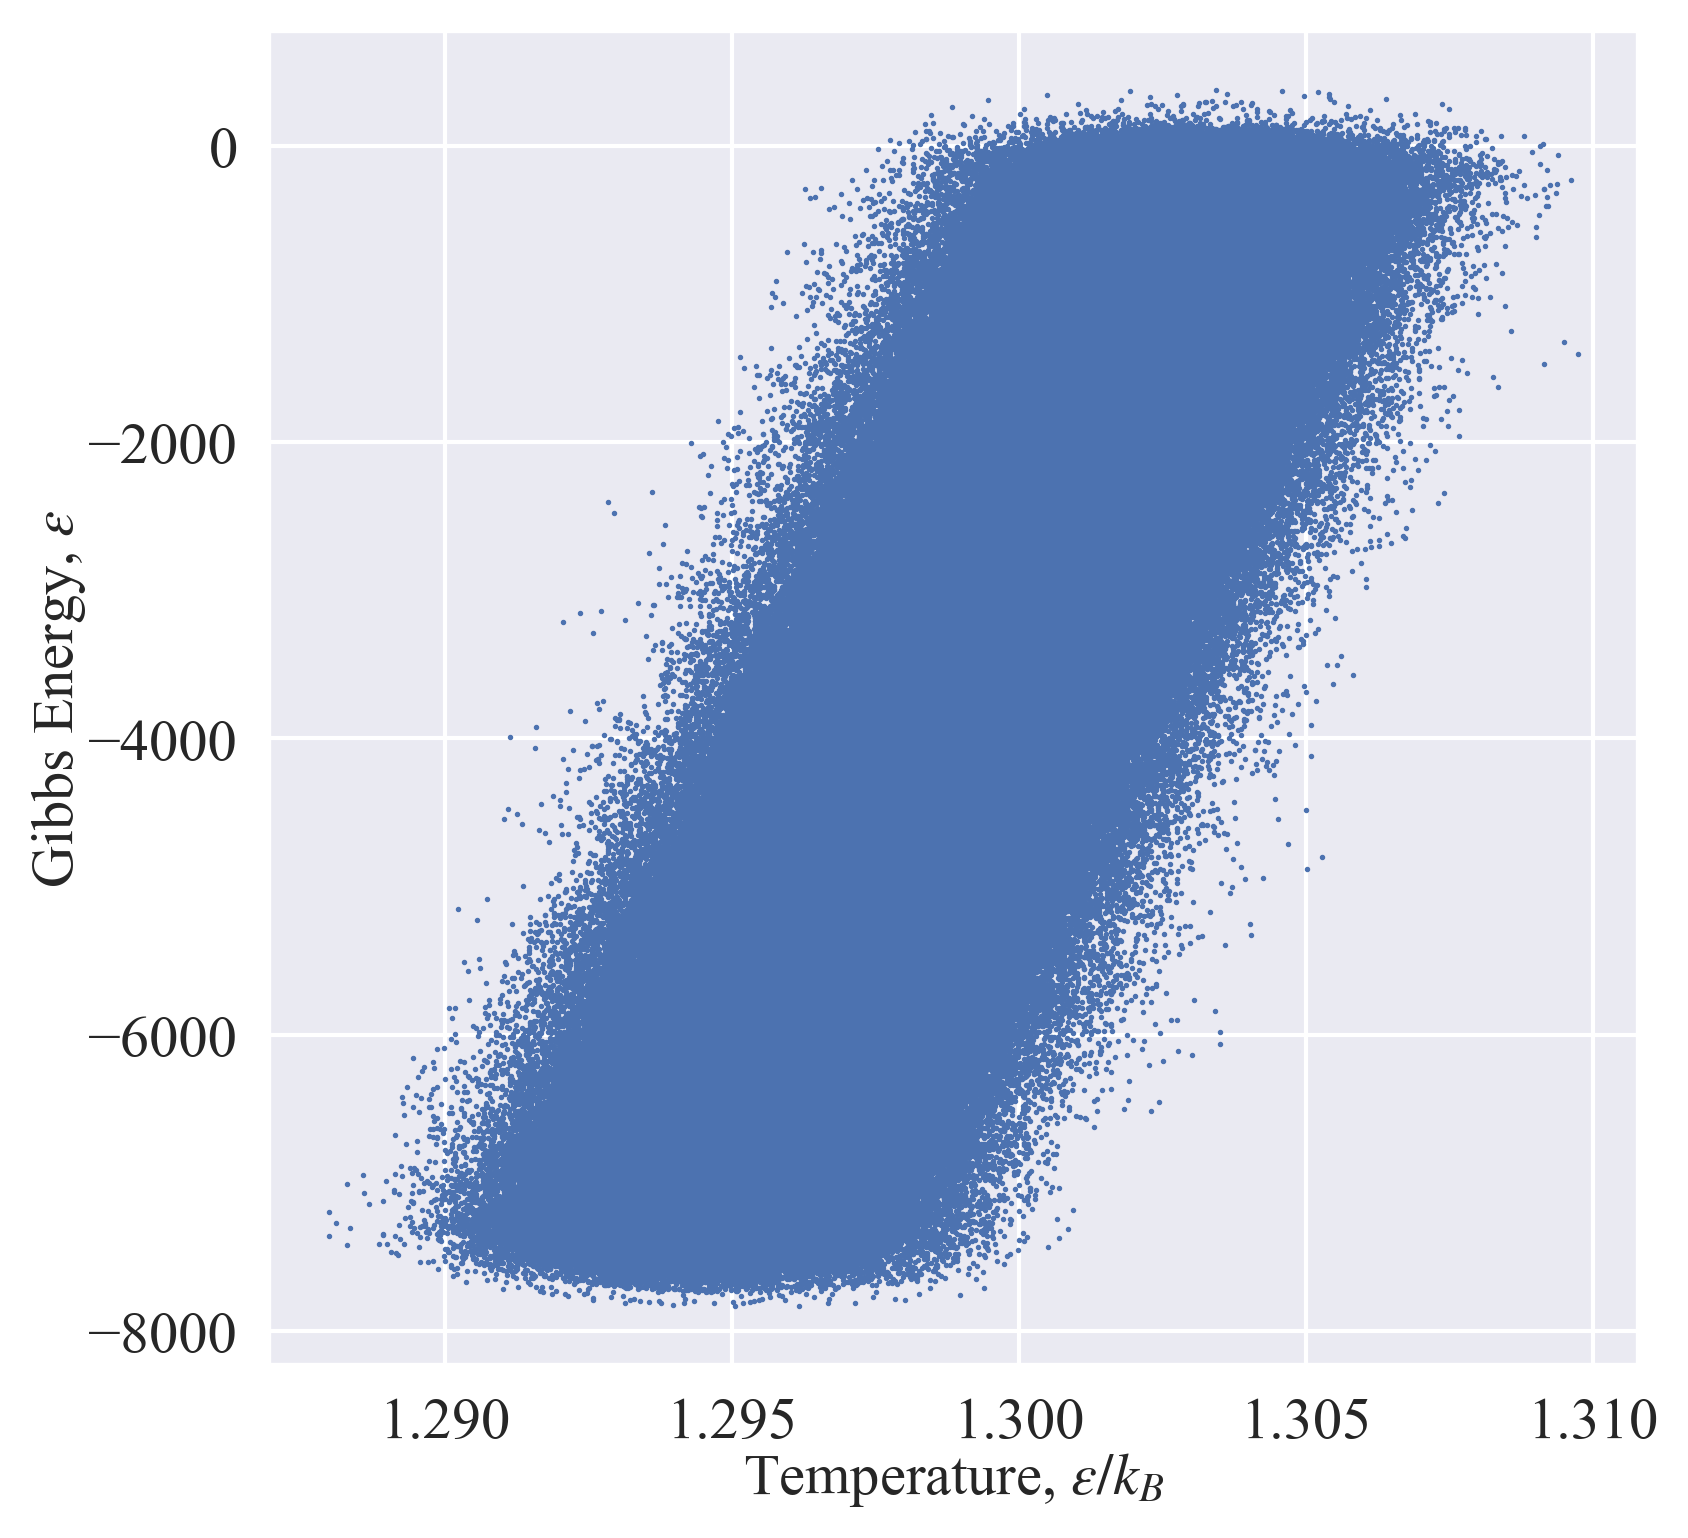

In [33]:
plt.scatter(pp.system_parameters['temperature'], pp.system_parameters['gibbs_energy'], s=1);
plt.xlabel(r'Temperature, $\epsilon/k_B $',)
plt.ylabel(r'Gibbs Energy, $\epsilon$',)
plt.show();

#### Зависимость энергии Гиббса от давления системы

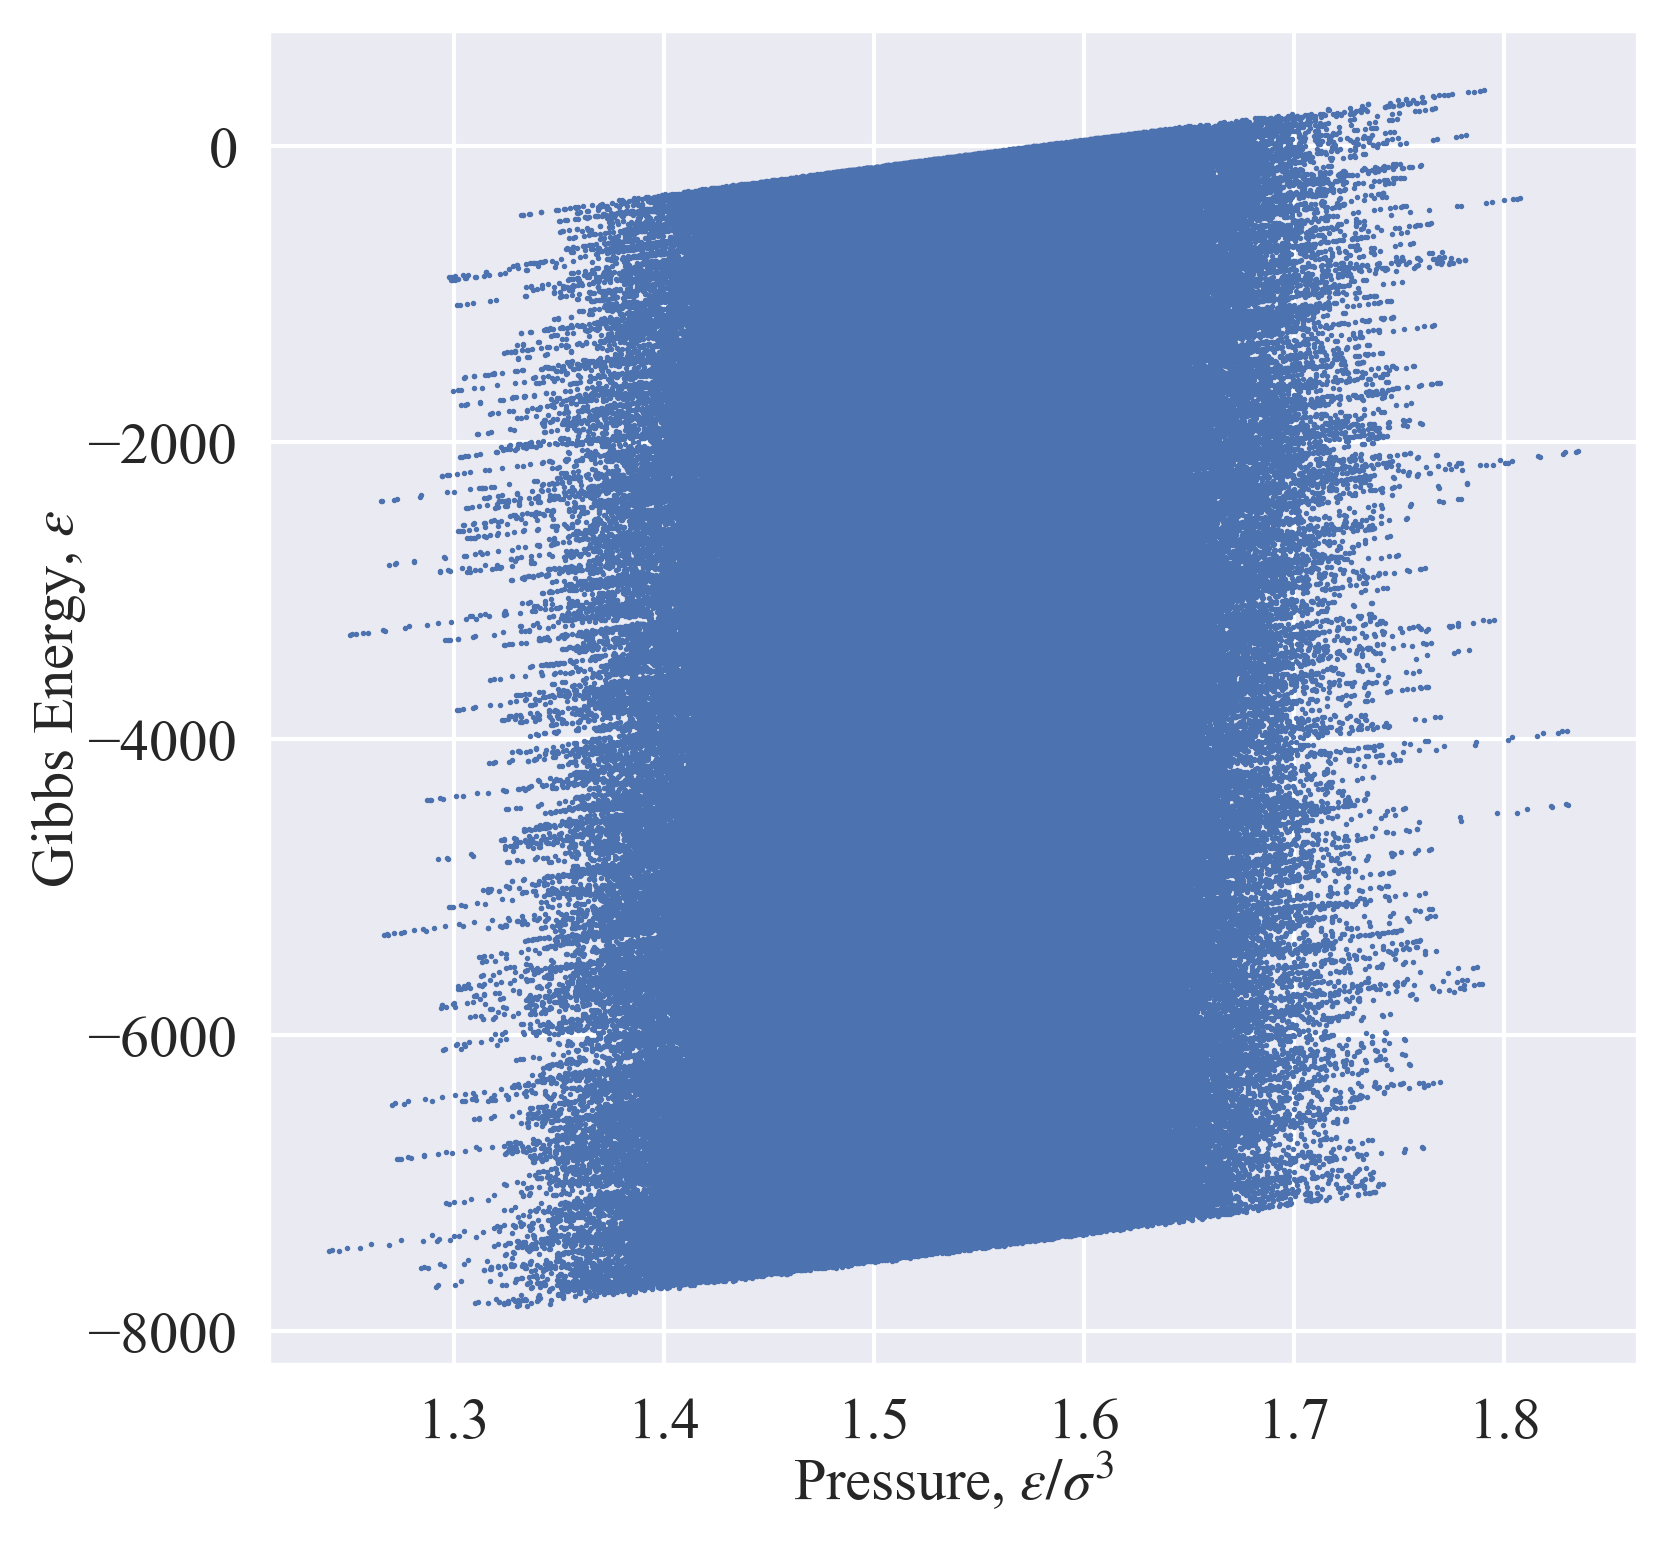

In [34]:
plt.scatter(pp.system_parameters['pressure'], pp.system_parameters['gibbs_energy'], s=1);
plt.xlabel(r'Pressure, $\epsilon / \sigma^3 $')
plt.ylabel(r'Gibbs Energy, $\epsilon$',)
plt.show();

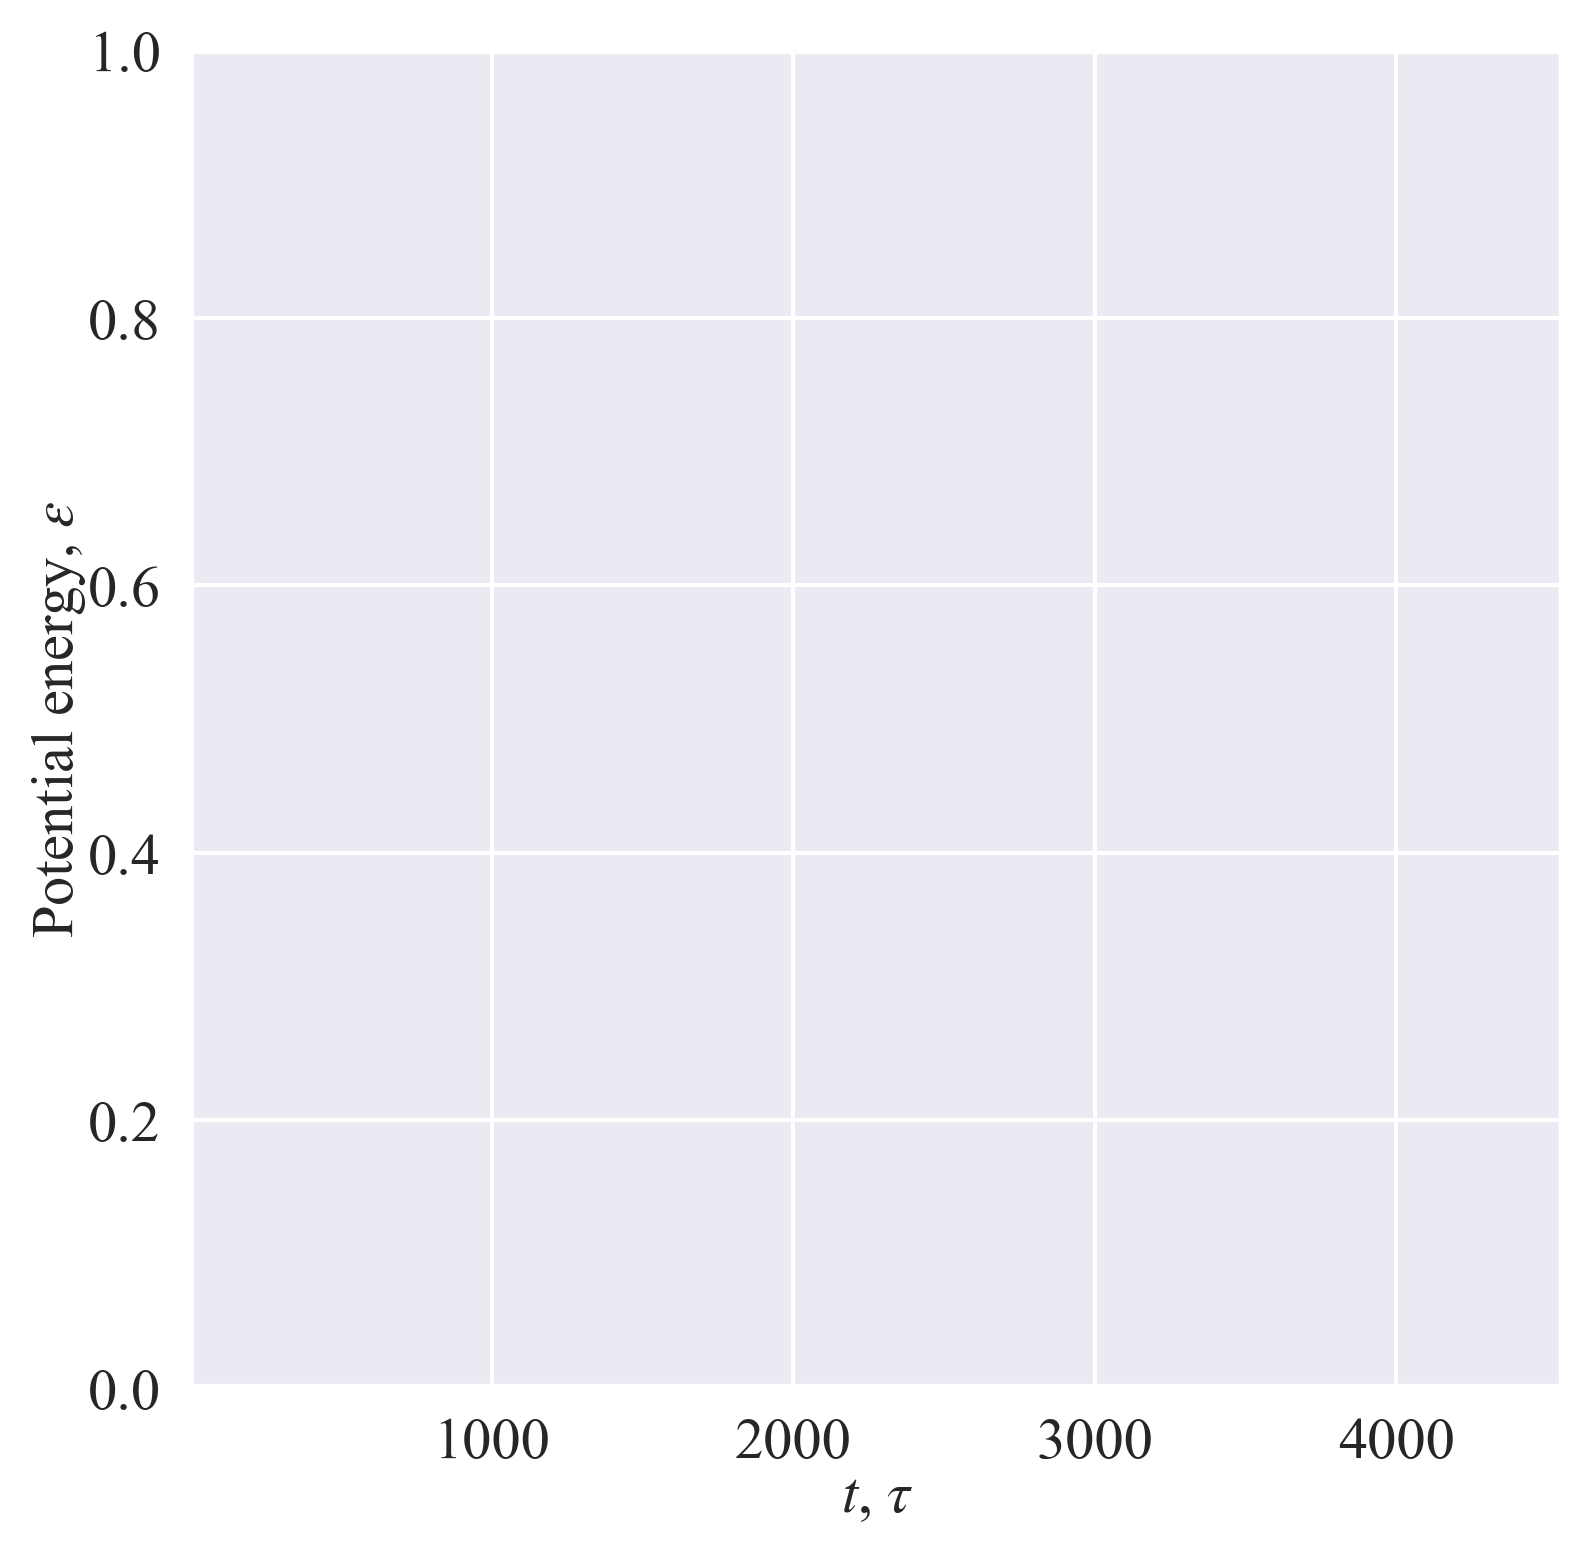

In [35]:
pp.plot_system_parameters(
    column_names=['potential_energy',],
    y_label=r'Potential energy, $\epsilon$',
);